In [245]:
import pandas as pd

## Getting data

In [246]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

At first it looks like there are many missing values

In [247]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EDA

## Univariate analysis

Columns with over 17% missing values, will get difficult to fill, that's why we are going to erase it

In [248]:
import pandas as pd

def summarize_nulls(df):
    null_counts = df.isnull().sum()
    null_percentage = (null_counts / len(df)) * 100

    null_summary = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': null_percentage
    }).sort_values(by='Null Count', ascending=False)

    # Filter out columns that have no nulls
    null_summary = null_summary[null_summary['Null Count'] > 0]

    return null_summary

summary = summarize_nulls(df_train)
summary

Null Count  Null Percentage
PoolQC              1453        99.520548
MiscFeature         1406        96.301370
Alley               1369        93.767123
Fence               1179        80.753425
MasVnrType           872        59.726027
FireplaceQu          690        47.260274
LotFrontage          259        17.739726
GarageQual            81         5.547945
GarageFinish          81         5.547945
GarageType            81         5.547945
GarageYrBlt           81         5.547945
GarageCond            81         5.547945
BsmtFinType2          38         2.602740
BsmtExposure          38         2.602740
BsmtCond              37         2.534247
BsmtQual              37         2.534247
BsmtFinType1          37         2.534247
MasVnrArea             8         0.547945
Electrical             1         0.068493

In [249]:
null_percentage = df_train.isnull().mean() * 100
null_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [250]:
df_cleaned = df_train.loc[:, null_percentage <= 17]

After droping columns with null values over 17%, we just have columns with less than 6% of missing values

In [251]:
summary = summarize_nulls(df_cleaned)
summary

Null Count  Null Percentage
GarageYrBlt           81         5.547945
GarageQual            81         5.547945
GarageCond            81         5.547945
GarageType            81         5.547945
GarageFinish          81         5.547945
BsmtFinType2          38         2.602740
BsmtExposure          38         2.602740
BsmtQual              37         2.534247
BsmtCond              37         2.534247
BsmtFinType1          37         2.534247
MasVnrArea             8         0.547945
Electrical             1         0.068493

In [252]:
df_cleaned['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

We are going to plot the histograms of each one and then see how much the distribution after filling the nulls with mean or mode make a difference on the distribution

### GarageYrBlt

In [253]:
import matplotlib.pyplot as plt

def plot_hist(df, column, bins=30):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=bins, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

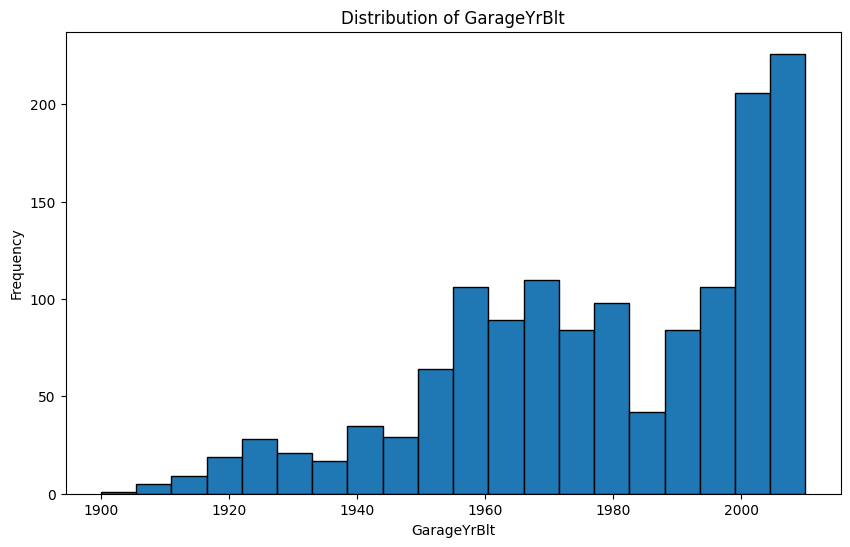

In [254]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

In [255]:
df_cleaned['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

We see that the mean value is around 1978 so, if we would put that value for filling the nulls, that would cause a different distribution, but instead if we use the mode, the distribution would keep almost the same with a predominant values at the right

In [256]:
mode_value = df_cleaned['GarageYrBlt'].mode()
df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(mode_value)


C:\Users\quine\AppData\Local\Temp\ipykernel_13412\2270844046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(mode_value)


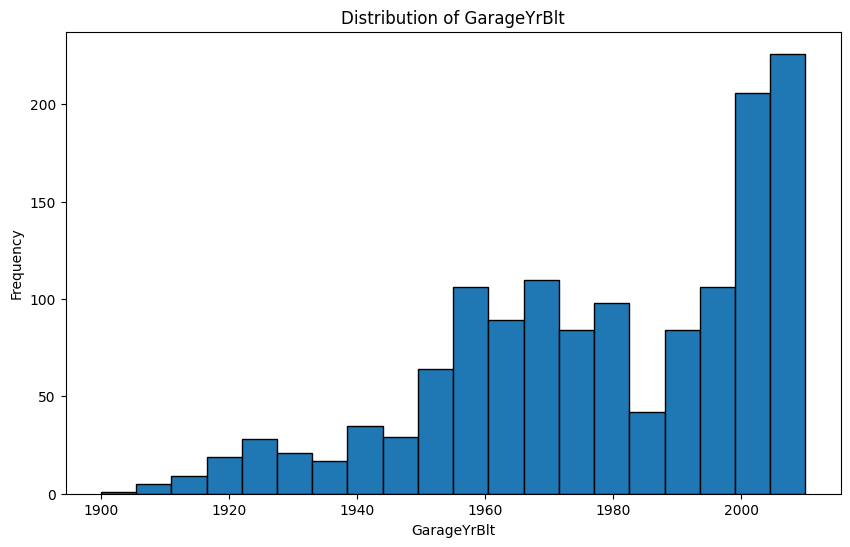

In [257]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

As we see, the distribution is almost the same, we will use the same approach for the other columns 

### GarageQual

For this variable, we can notice that the category 'TA' has a huge proportion of all values in the dataset, so, even if we manage to reduce the categories the proporcion would be too little for non-TA categories, we will drop this

In [258]:
df_cleaned['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [259]:
df_cleaned = df_cleaned.drop('GarageQual', axis=1)

### GarageCond

In [260]:
df_cleaned['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

As we did priously we will drop this column

In [261]:
df_cleaned = df_cleaned.drop('GarageCond', axis=1)

### GarageType

In [262]:
df_cleaned['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

Here we will use the most common category for filling the nulls

In [263]:
most_common_category = df_cleaned['GarageType'].mode()[0]  # <-- [0] to get the first value
df_cleaned['GarageType'] = df_cleaned['GarageType'].fillna(most_common_category)


### GarageFinish

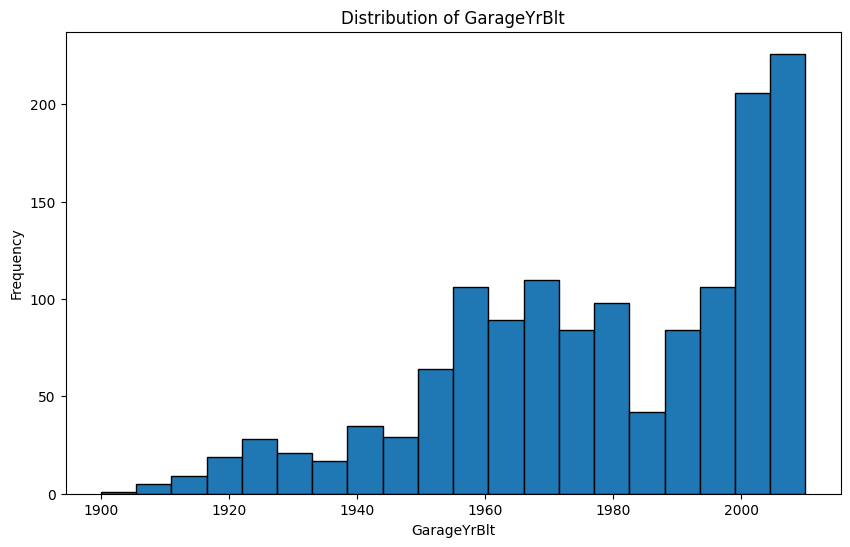

In [264]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

In [265]:
df_cleaned['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Here we will use the mode

In [266]:
mode_value = df_cleaned['GarageYrBlt'].mode()
df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(mode_value[0])  # <-- [0] to get the first value

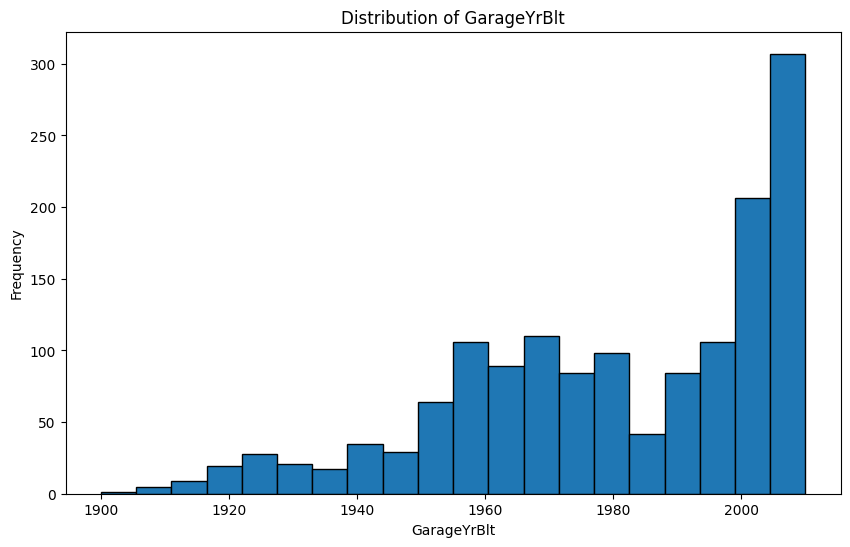

In [267]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

### BsmtFinType2

In [268]:
df_cleaned['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

Here we will replace the nulls with the most common category

In [269]:
most_common_category = df_cleaned['BsmtFinType2'].mode()[0]
df_cleaned['BsmtFinType2'] = df_cleaned['BsmtFinType2'].fillna(most_common_category)

### BsmtExposure

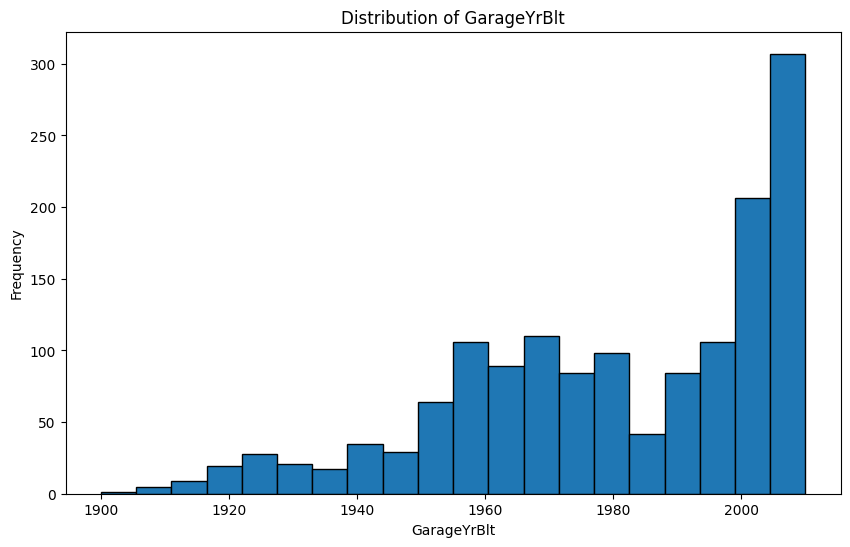

In [270]:
plot_hist(df_cleaned, 'GarageYrBlt', bins=20)

In [271]:
df_cleaned['GarageYrBlt'].describe()

count    1460.000000
mean     1979.976027
std        24.749688
min      1900.000000
25%      1962.000000
50%      1984.500000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Here we will use the mode

In [272]:
mode_value = df_cleaned['GarageYrBlt'].mode()
df_cleaned['GarageYrBlt'] = df_cleaned['GarageYrBlt'].fillna(mode_value[0])  # <-- [0] to get the first value 

### BsmtQual

In [273]:
df_cleaned['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [274]:
most_common_category = df_cleaned['BsmtQual'].mode()[0]
df_cleaned['BsmtQual'] = df_cleaned['BsmtQual'].fillna(most_common_category)

### BsmtCond

In [275]:
df_cleaned['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [276]:
most_common_category = df_cleaned['BsmtCond'].mode()[0]  
df_cleaned['BsmtCond'] = df_cleaned['BsmtCond'].fillna(most_common_category)

### BsmtFinType1

In [277]:
df_cleaned['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [278]:
most_common_category = df_cleaned['BsmtFinType1'].mode()[0]  # <-- [0] to get the first value
df_cleaned['BsmtFinType1'] = df_cleaned['BsmtFinType1'].fillna(most_common_category)

### MasVnrArea

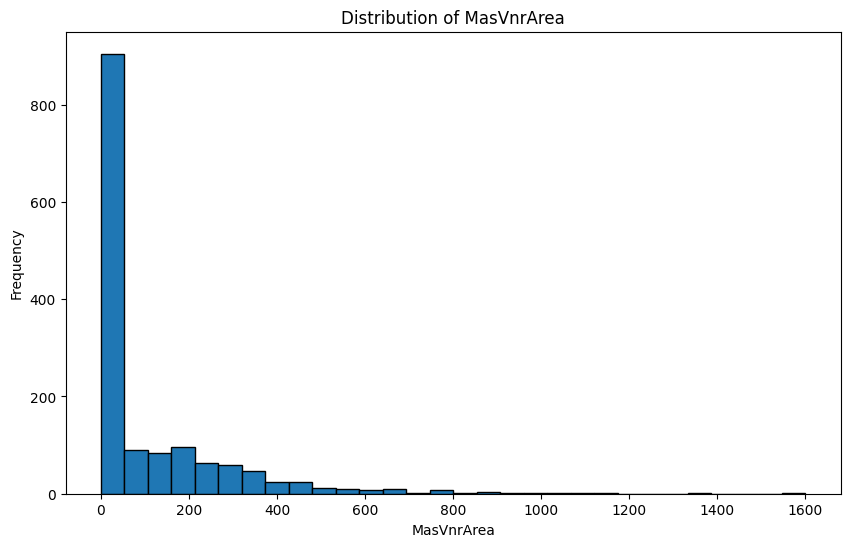

In [279]:
plot_hist(df_cleaned, 'MasVnrArea', bins=30)

In [280]:
df_cleaned['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [281]:
mode_value = df_cleaned['MasVnrArea'].mode()
df_cleaned['MasVnrArea'] = df_cleaned['MasVnrArea'].fillna(mode_value[0])  

### Electrical

In [282]:
df_cleaned['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [283]:
most_common_category = df_cleaned['Electrical'].mode()[0]  # <-- [0] to get the first value
df_cleaned['Electrical'] = df_cleaned['Electrical'].fillna(most_common_category)

### GarageFinish

In [284]:
df_cleaned['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [285]:
most_common_category = df_cleaned['GarageFinish'].mode()[0]  # <-- [0] to get the first value
df_cleaned['GarageFinish'] = df_cleaned['GarageFinish'].fillna(most_common_category)

### BsmtExposure

In [286]:
df_cleaned['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [287]:
most_common_category = df_cleaned['BsmtExposure'].mode()[0]  # <-- [0] to get the first value
df_cleaned['BsmtExposure'] = df_cleaned['BsmtExposure'].fillna(most_common_category)

We will check if there are some null values missings to fill

In [288]:
summary = summarize_nulls(df_cleaned)
summary

Empty DataFrame
Columns: [Null Count, Null Percentage]
Index: []

We will configure this to fully display the views

In [289]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [290]:
df_cleaned.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014  1979.976027   
std        0.815778      0.220338      1.625393     0.644666    24.749688   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1984.500000   
75%        3.000000      1.000000      7.000000     1.000000  2003.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.00

In [291]:
# all minus objects and categorical
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()

print(f"Amount of numerical columns: {len(numerical_columns)}")
numerical_columns

Amount of numerical columns: 37


['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

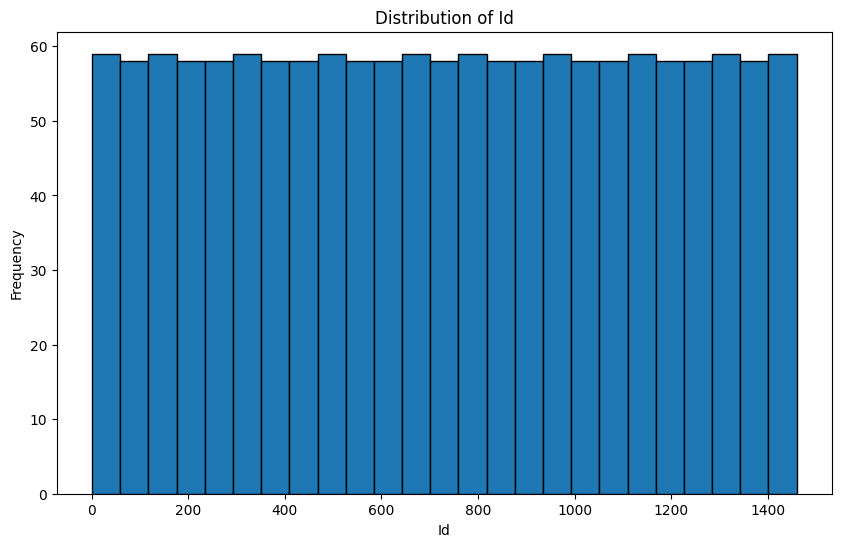

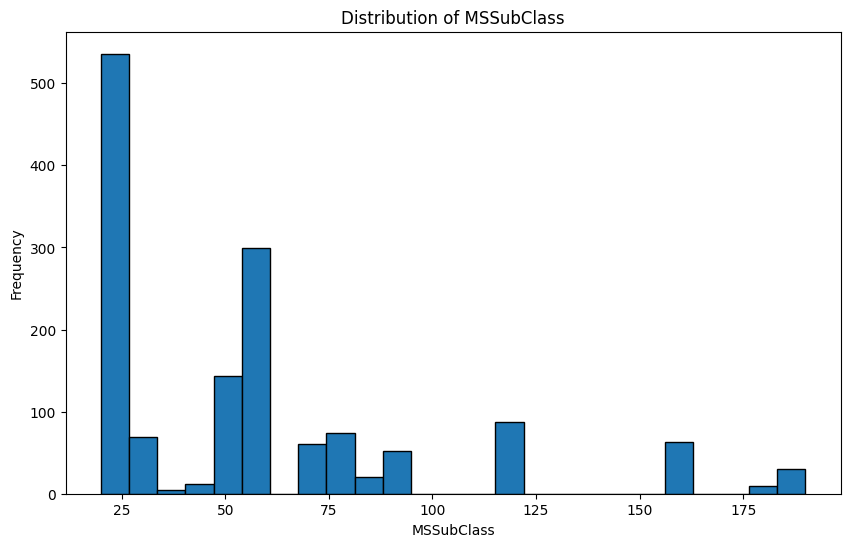

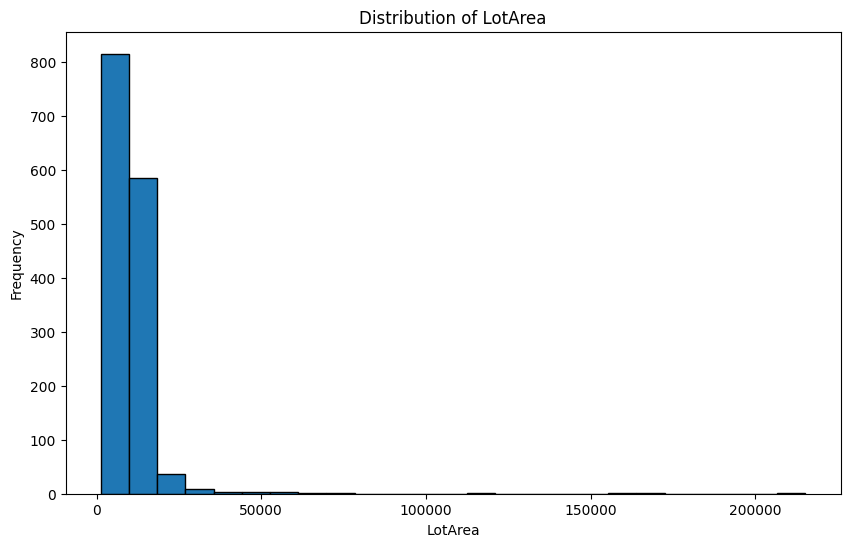

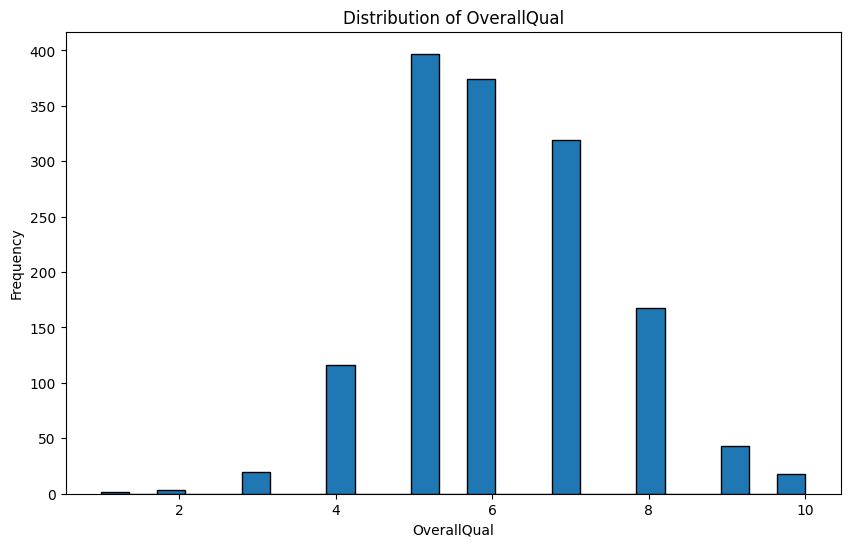

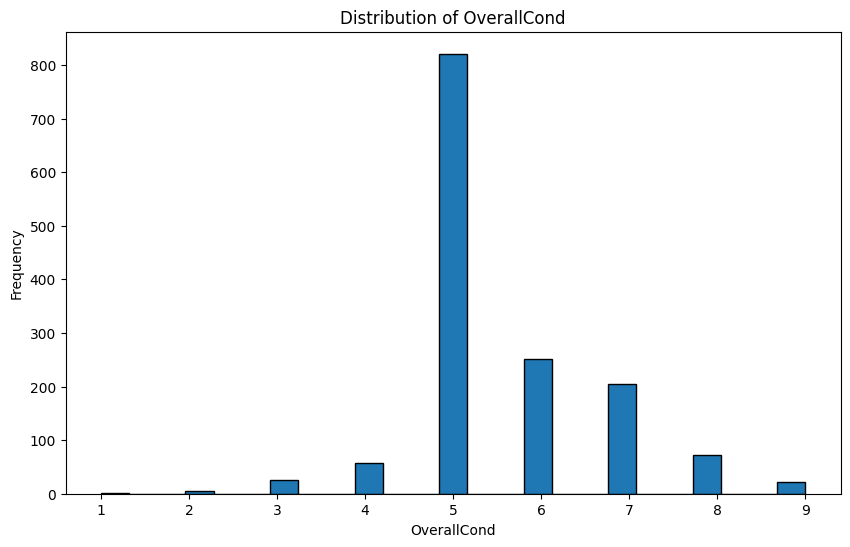

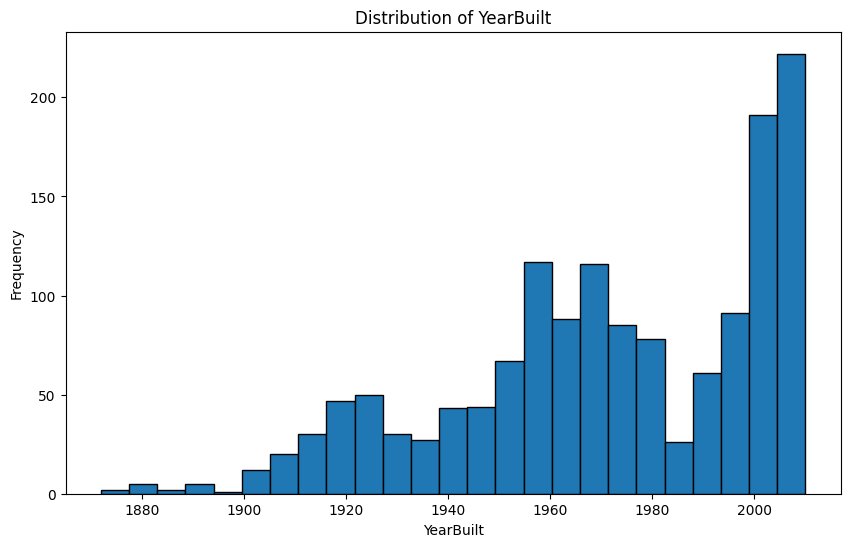

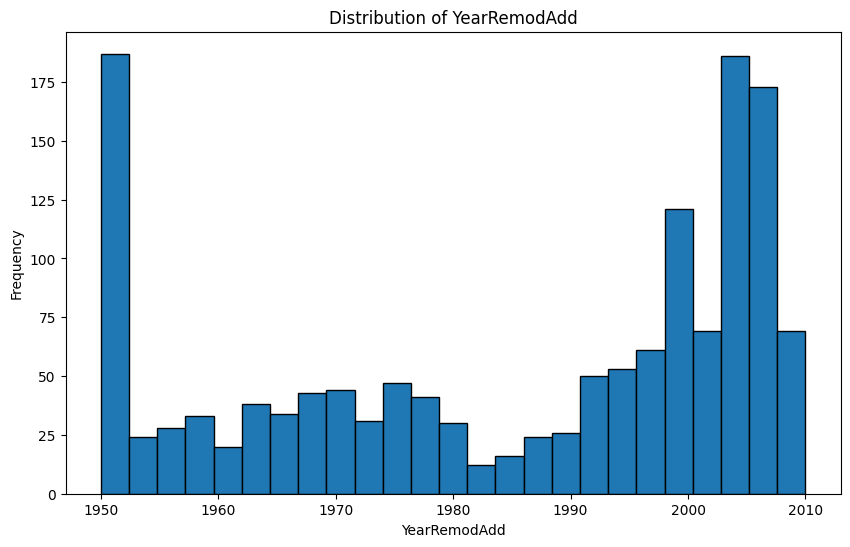

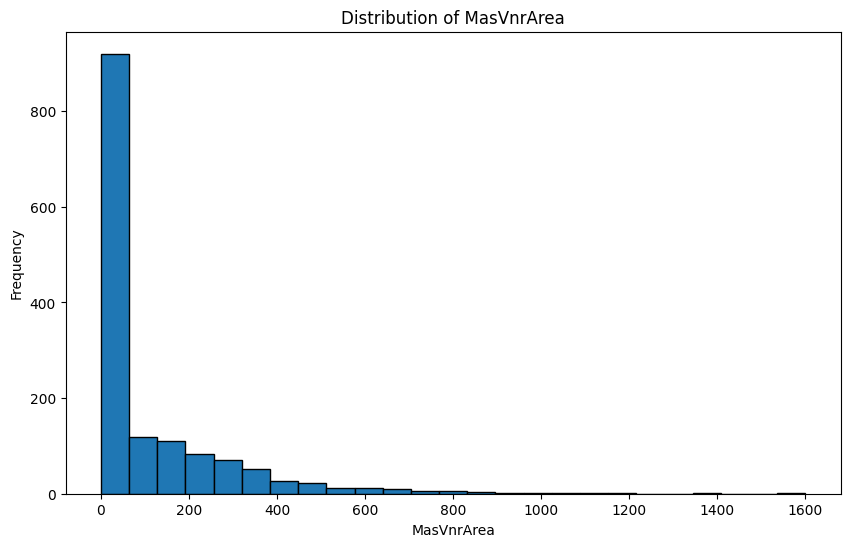

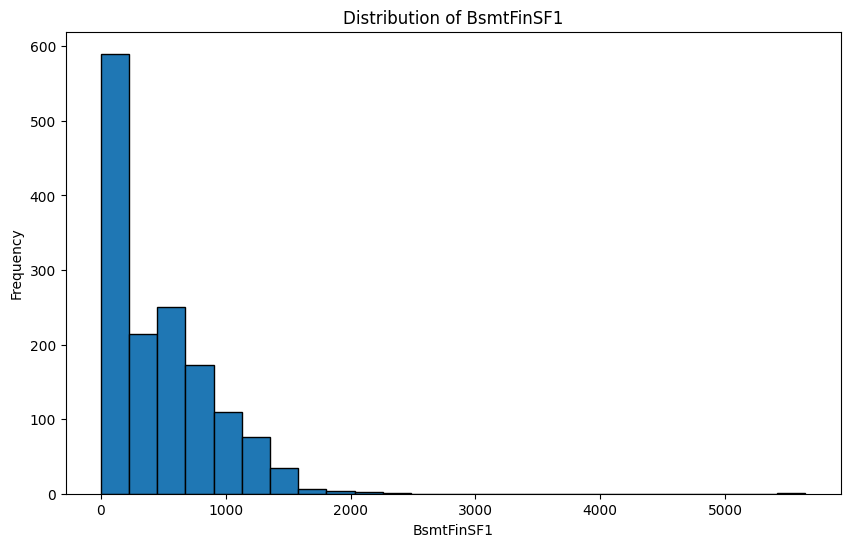

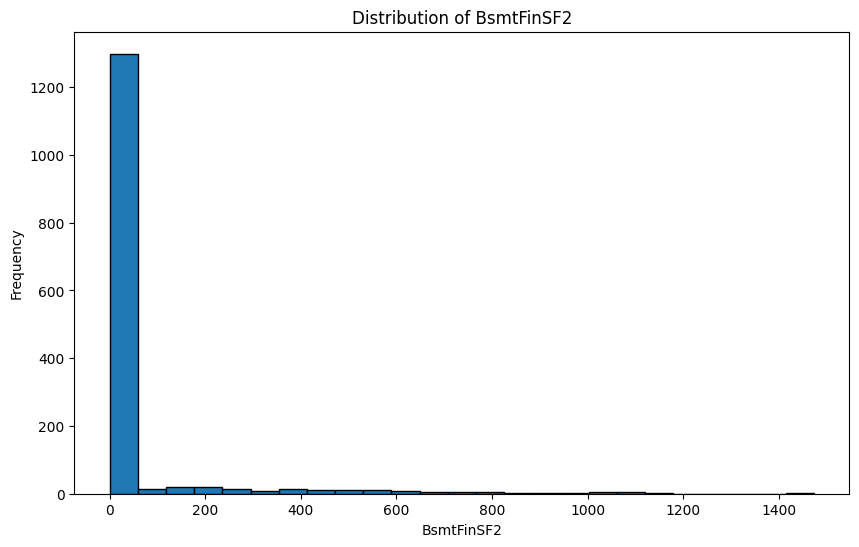

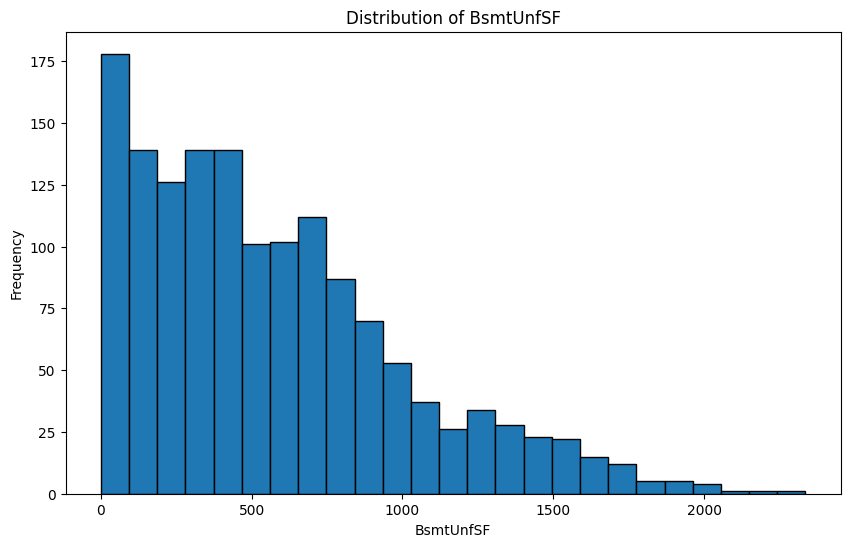

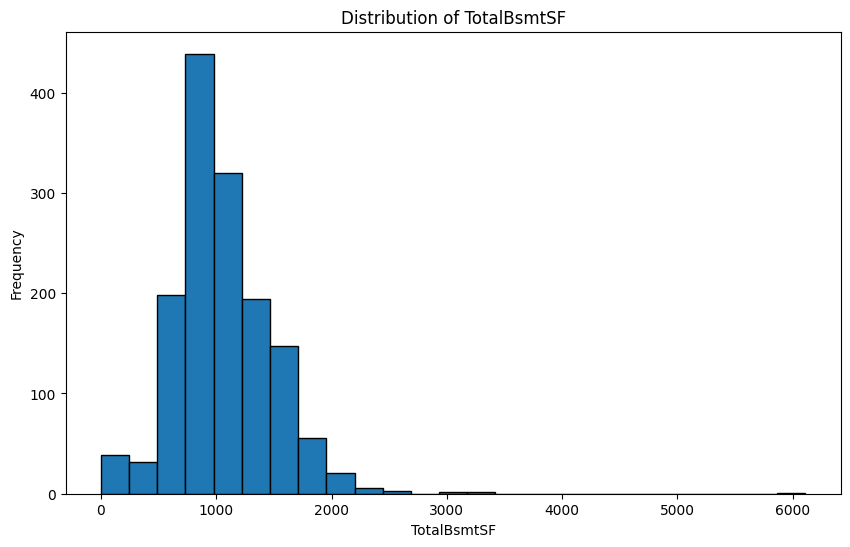

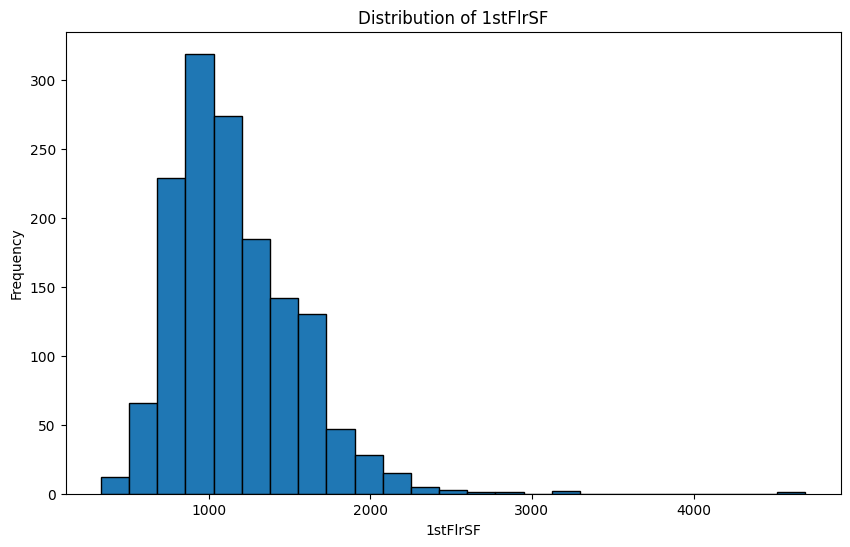

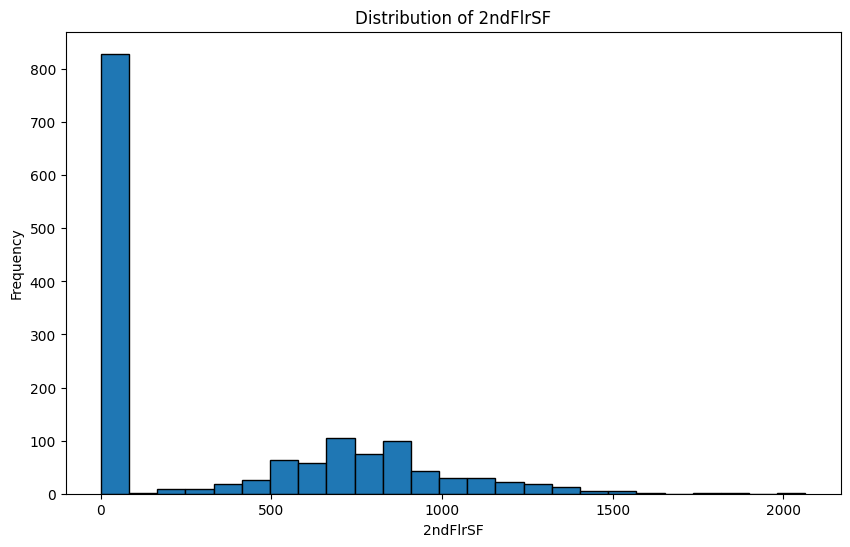

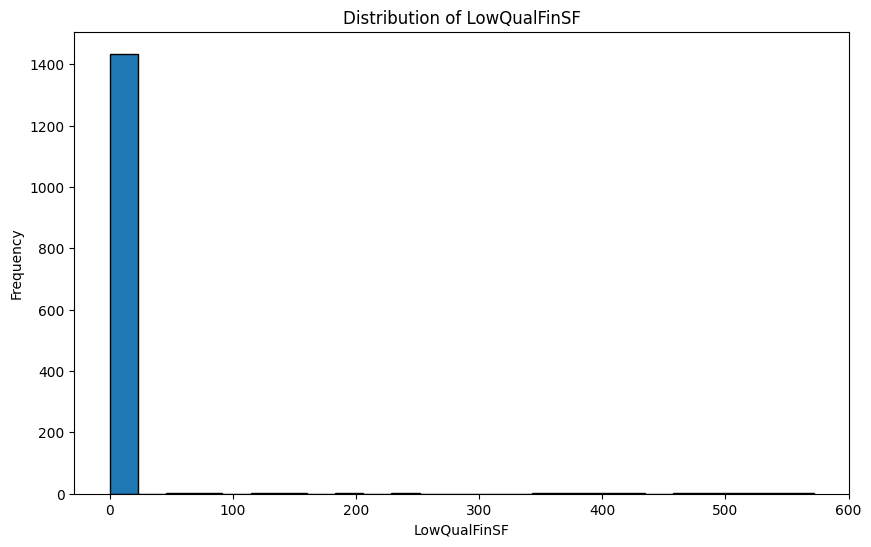

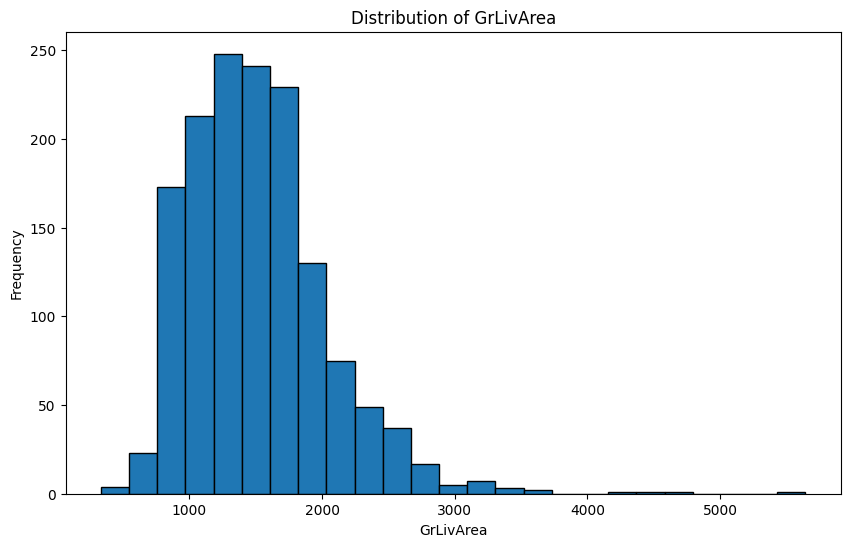

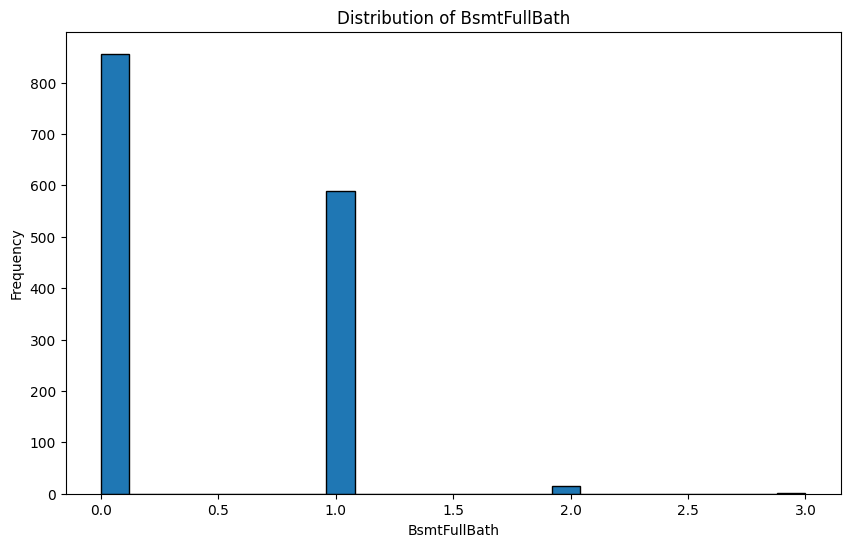

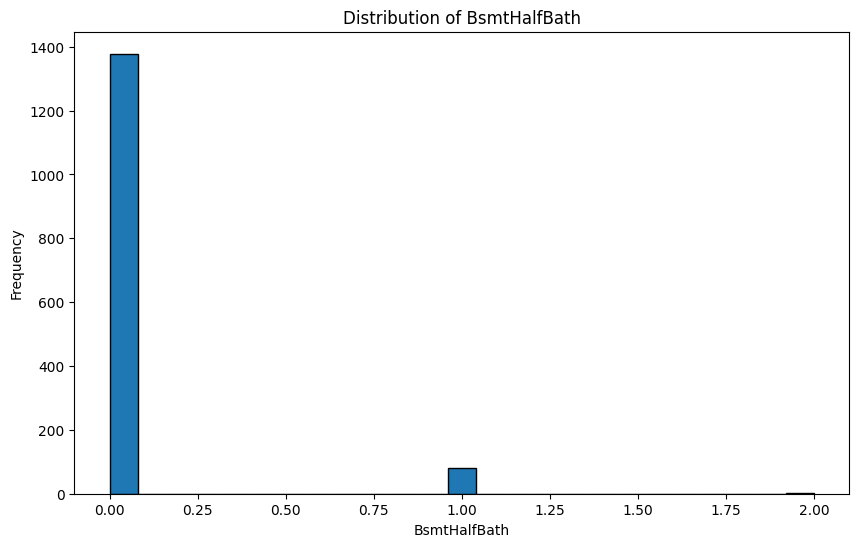

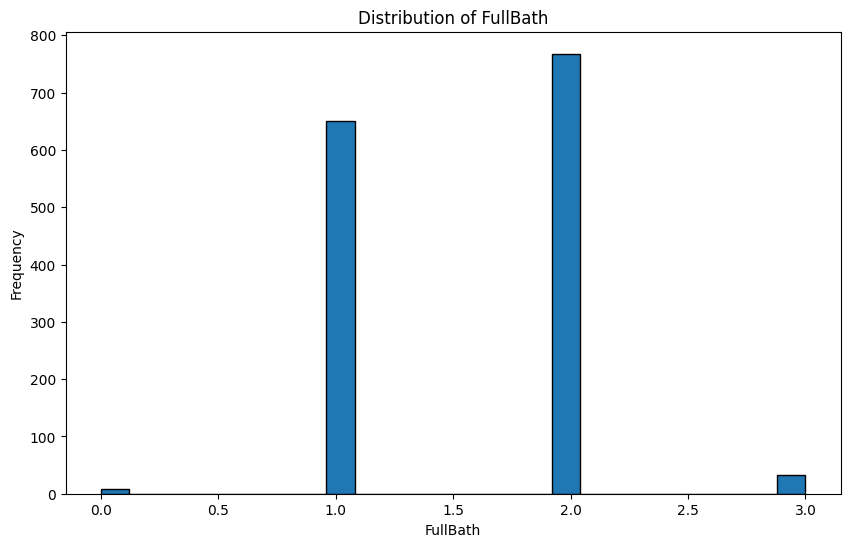

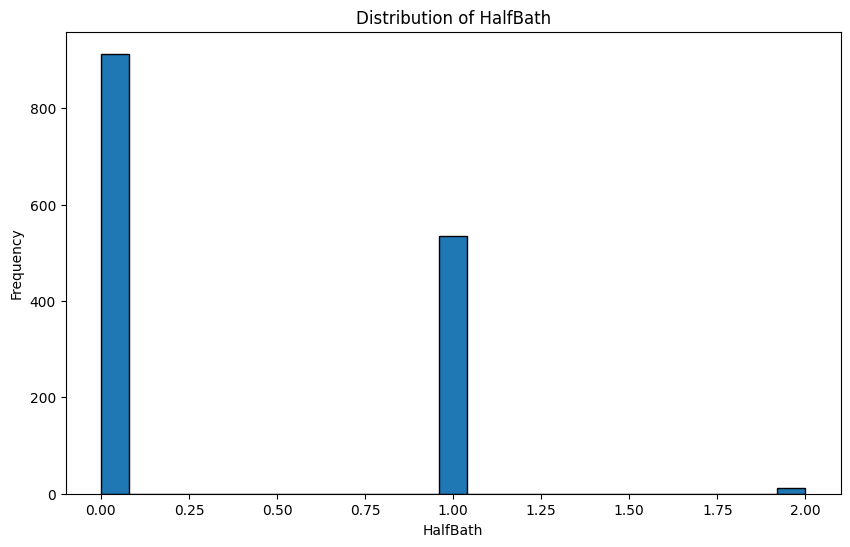

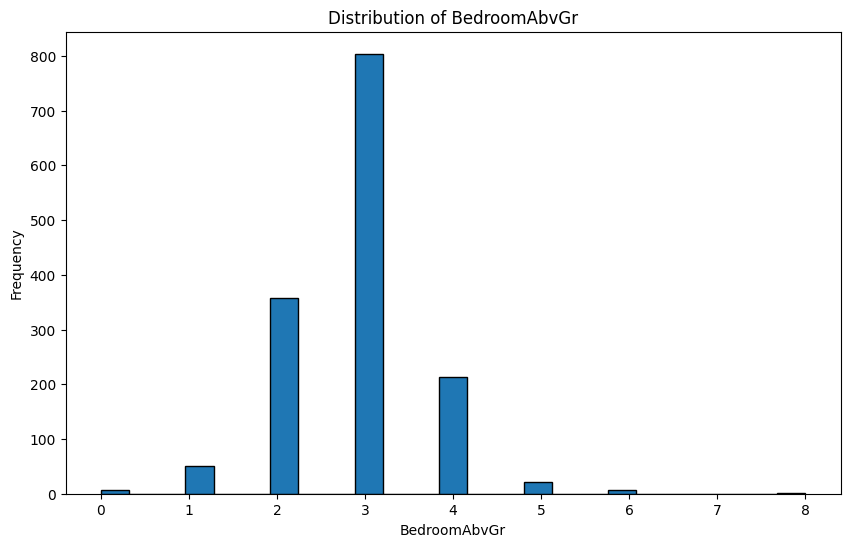

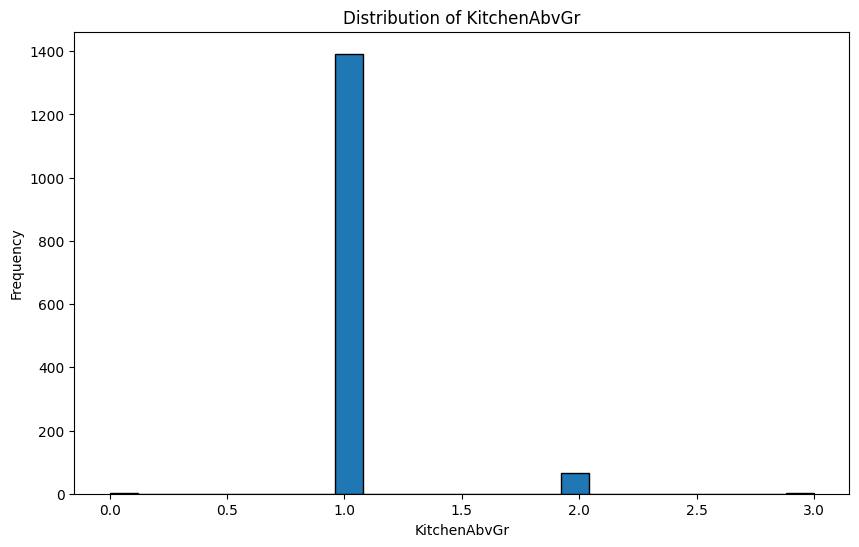

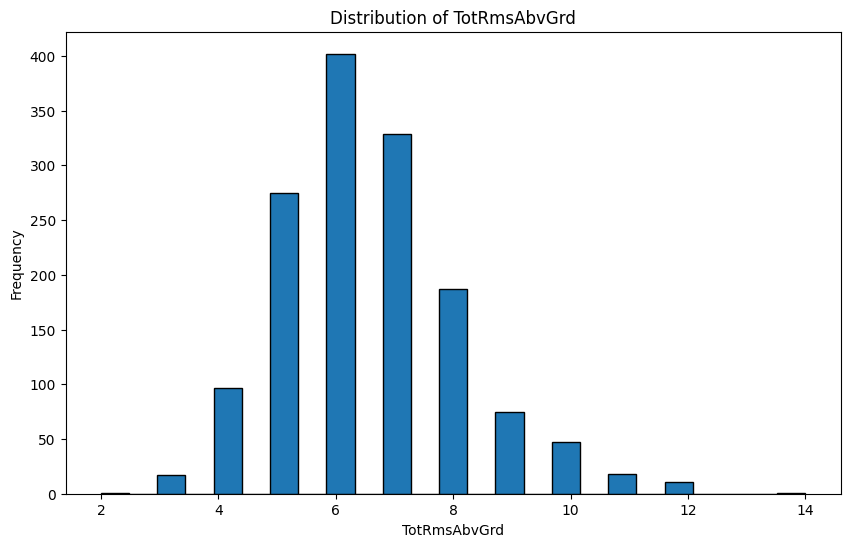

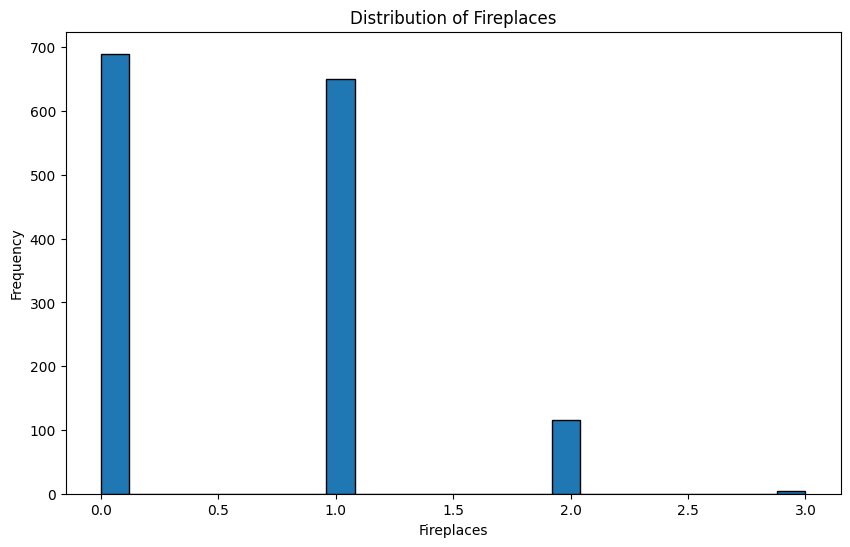

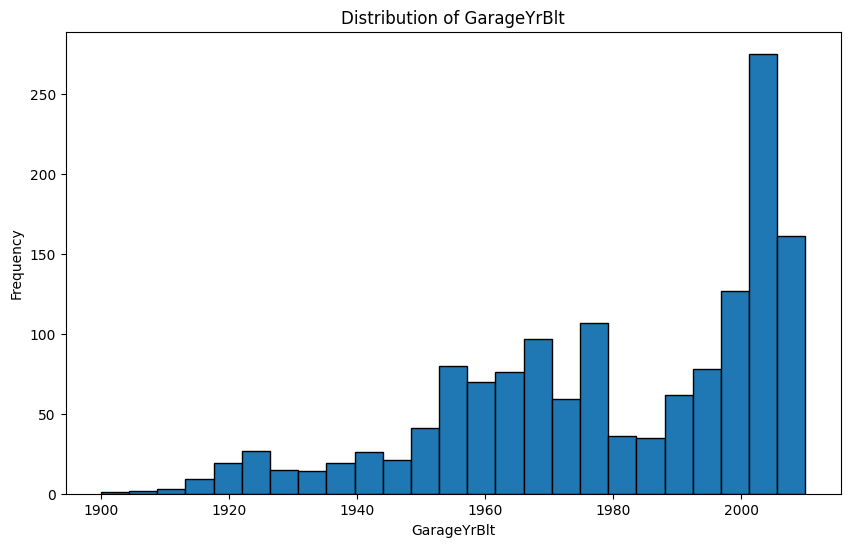

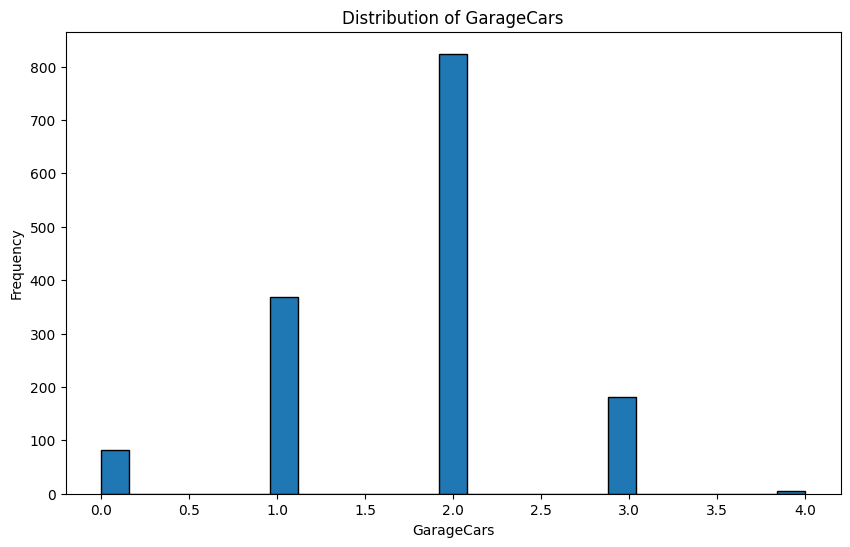

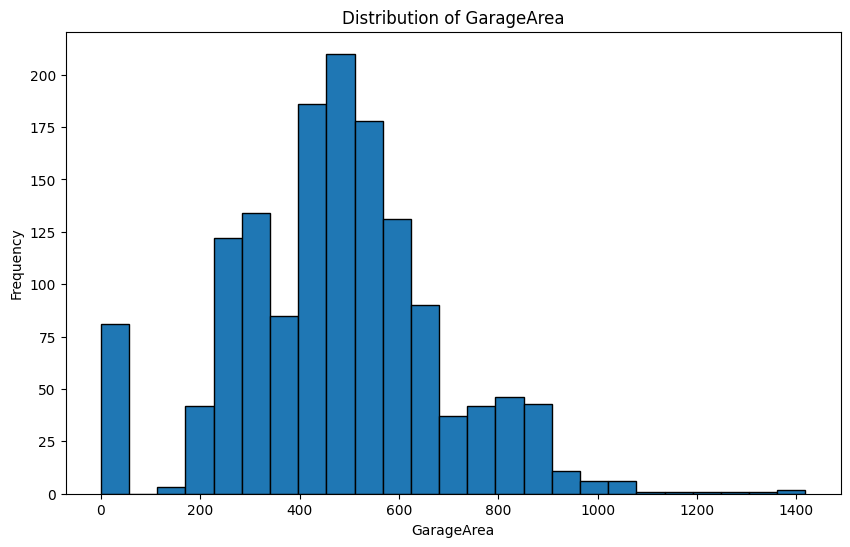

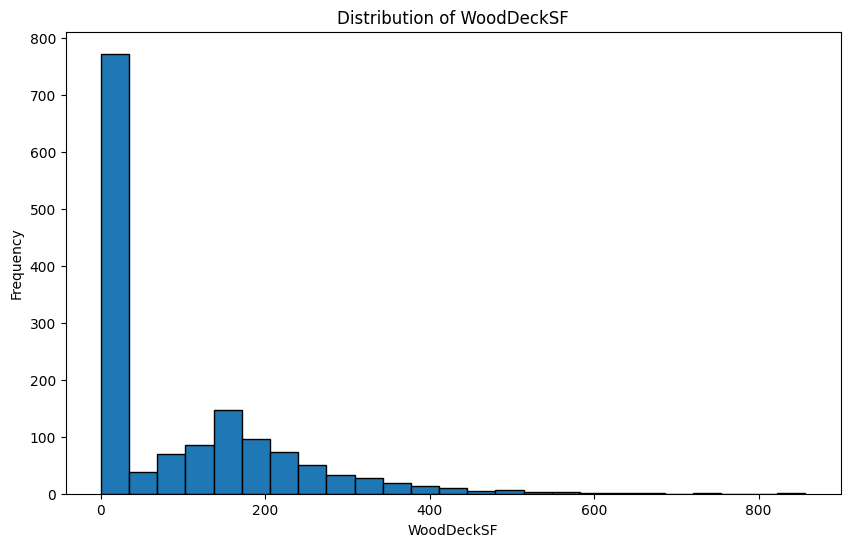

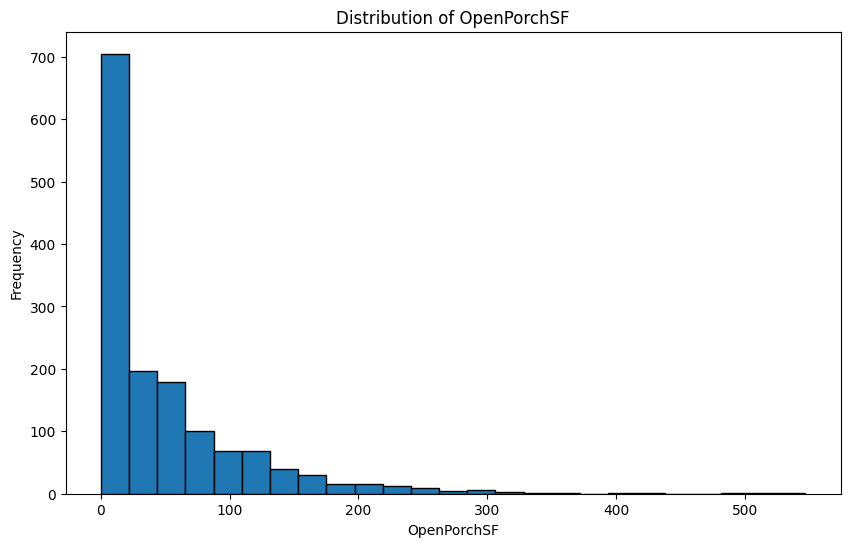

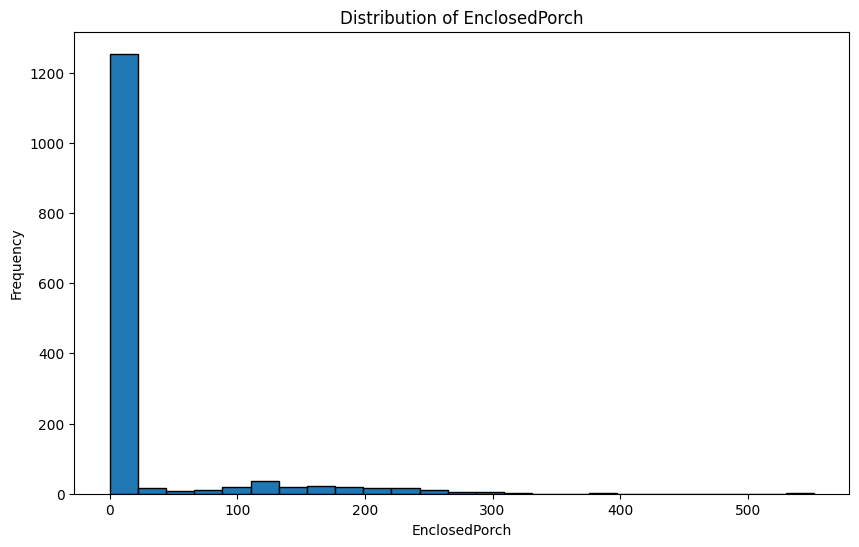

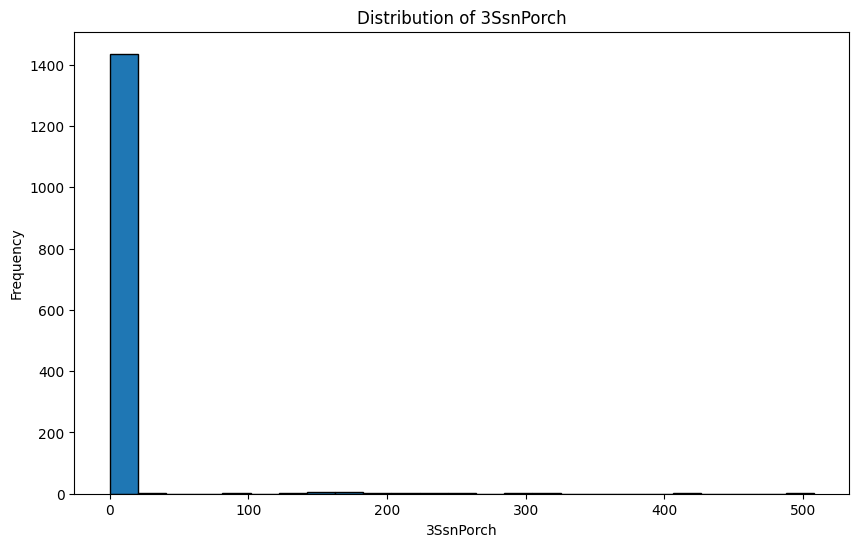

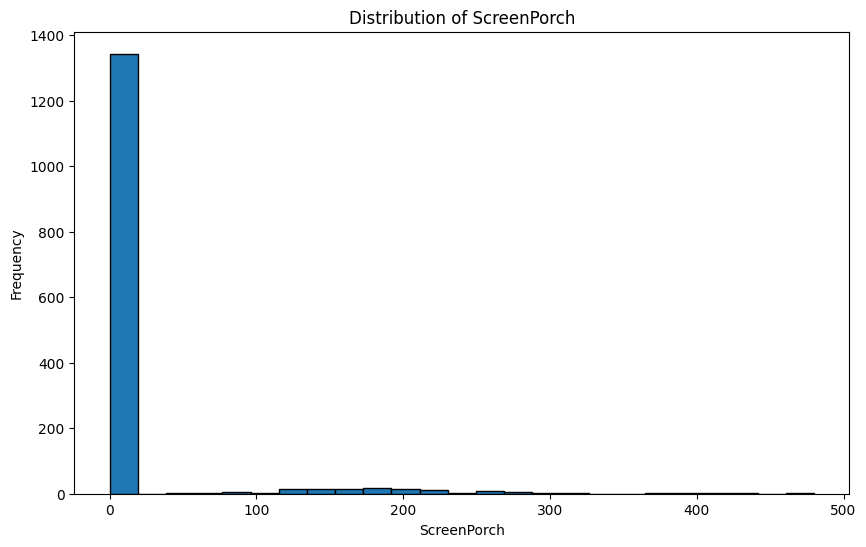

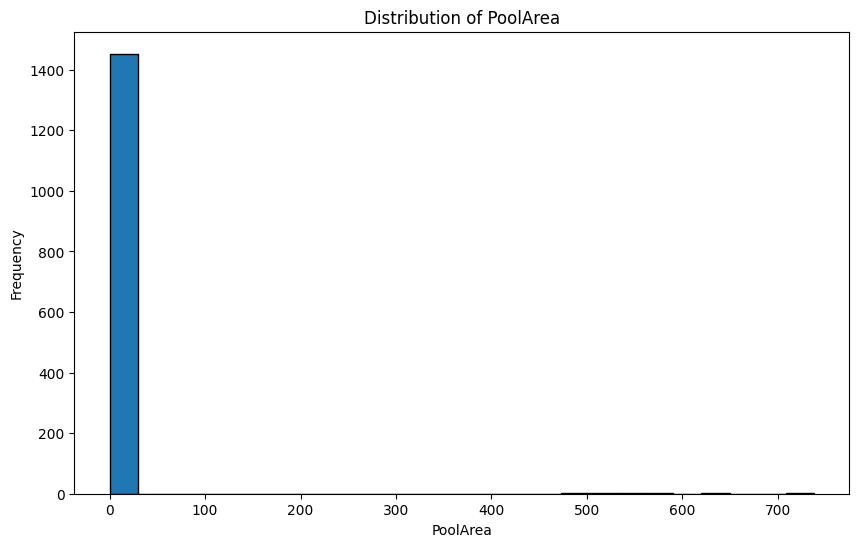

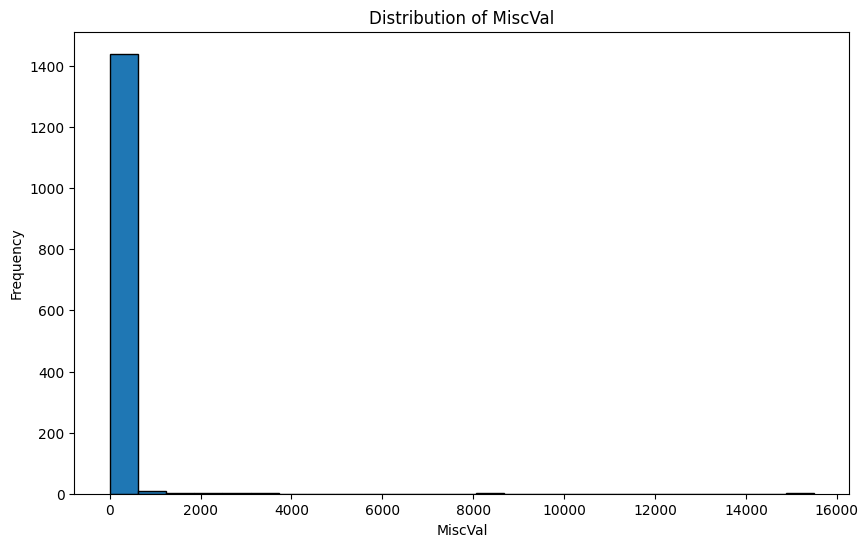

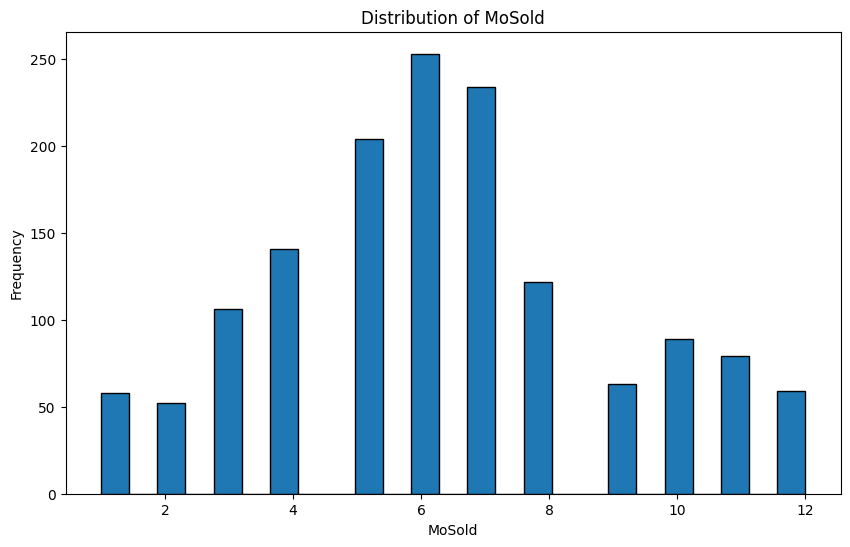

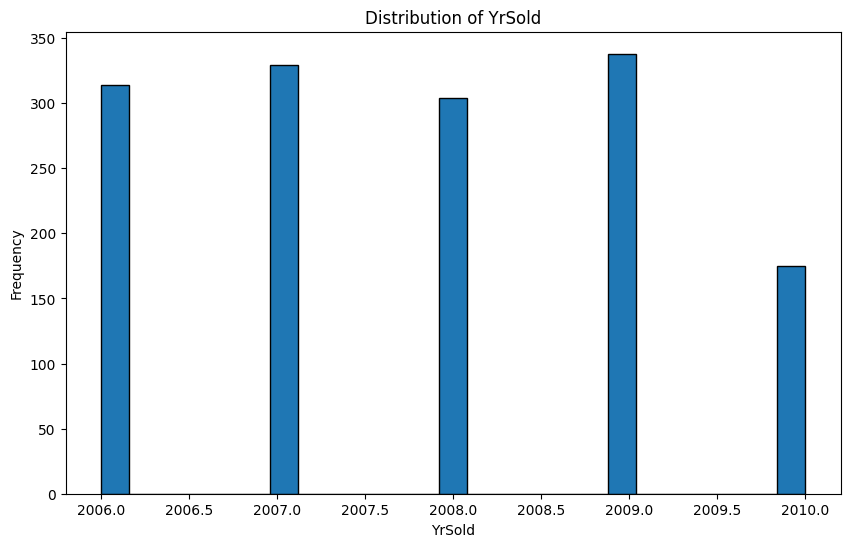

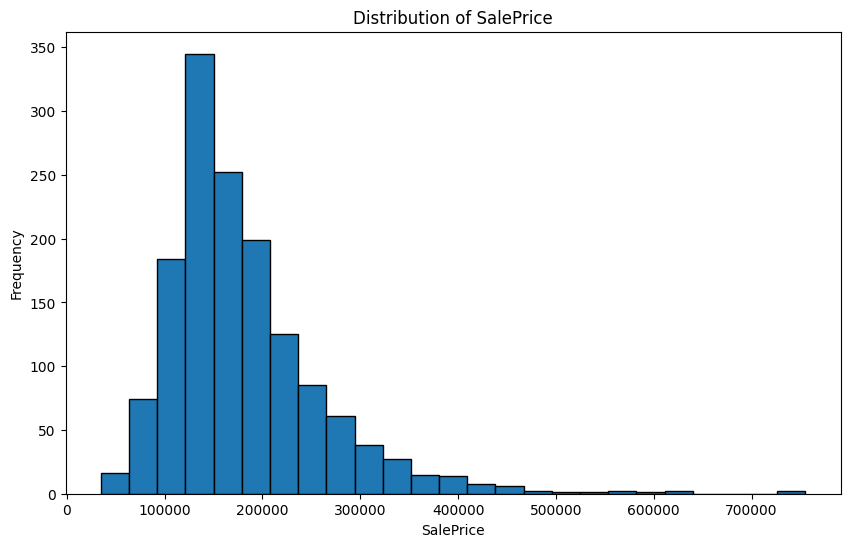

In [292]:
for numeric_col in numerical_columns: # passing each into a histogram
    plot_hist(df_cleaned, numeric_col, bins=25)  # <-- Adjust the number of bins as needed

After a first look we can see that some hist show us that there are values that are almost contants or that has just two or three values which are very imbalanced, so we will drop the following columns

In [293]:
numerical_columns

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [294]:
columns_to_drop = [
    'BsmtFinSF2',
    '2ndFlrSF',
    'LowQualFinSF',
    'BsmtHalfBath',
    'KitchenAbvGr',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal'
]

df_cleaned = df_cleaned.drop(columns=columns_to_drop)


In [295]:
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

print(f"Amount of categorical columns: {len(categorical_columns)}")
categorical_columns

Amount of categorical columns: 35


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

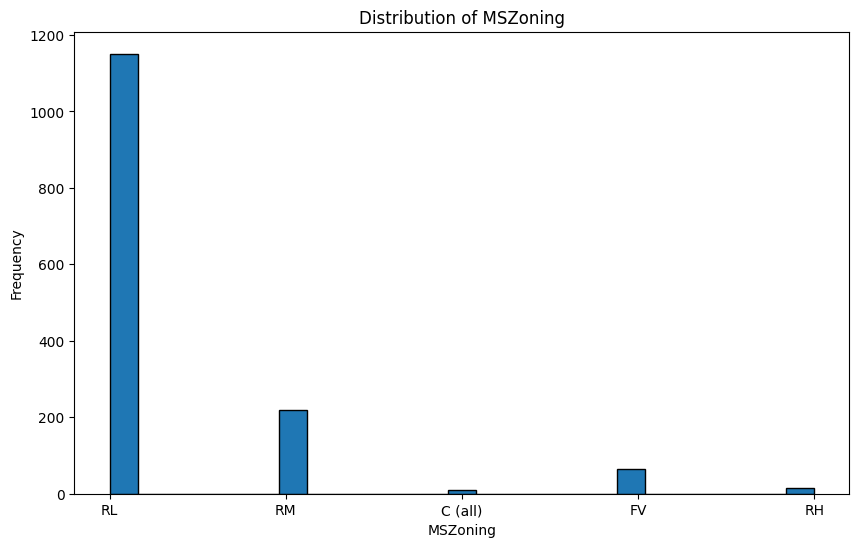

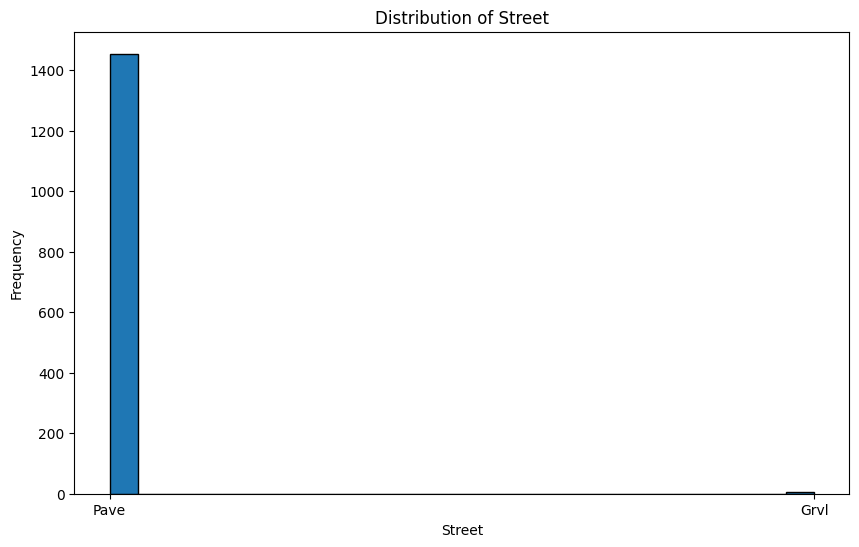

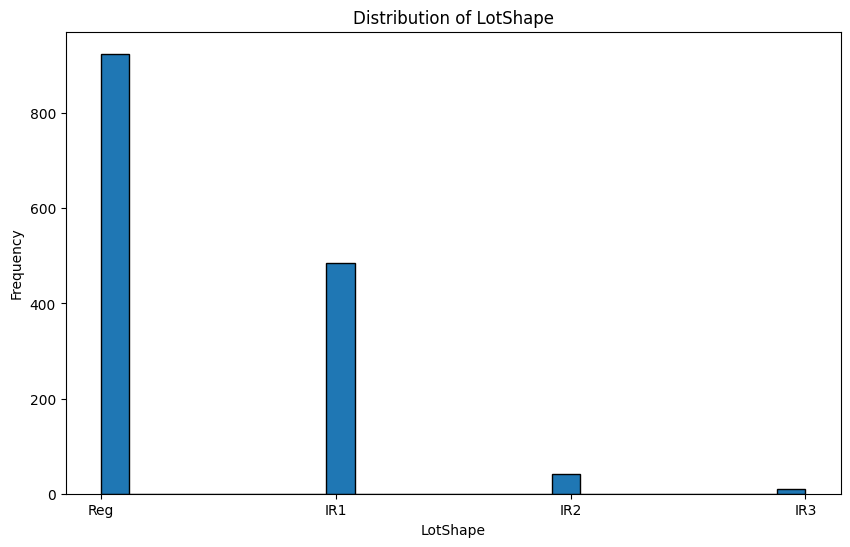

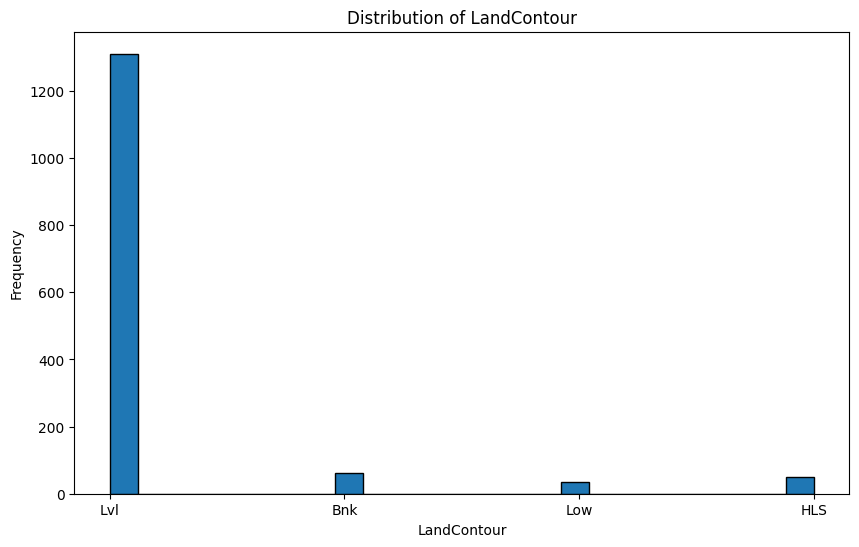

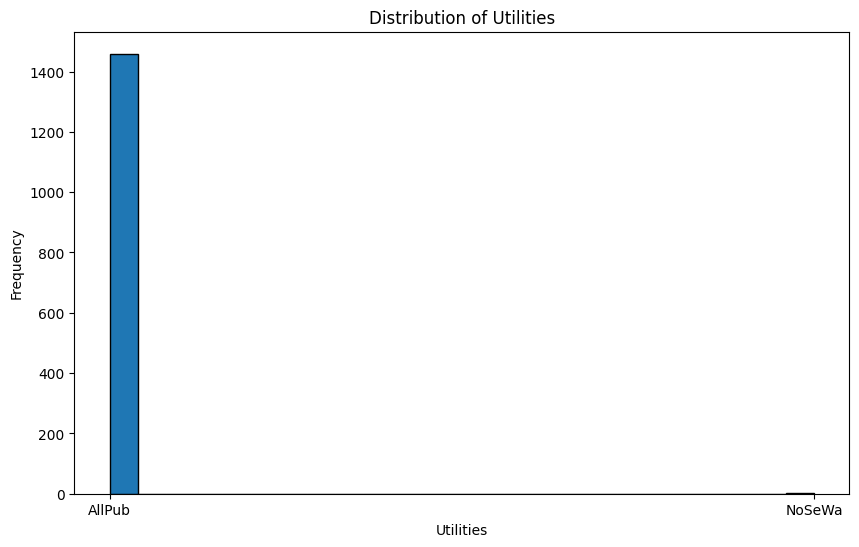

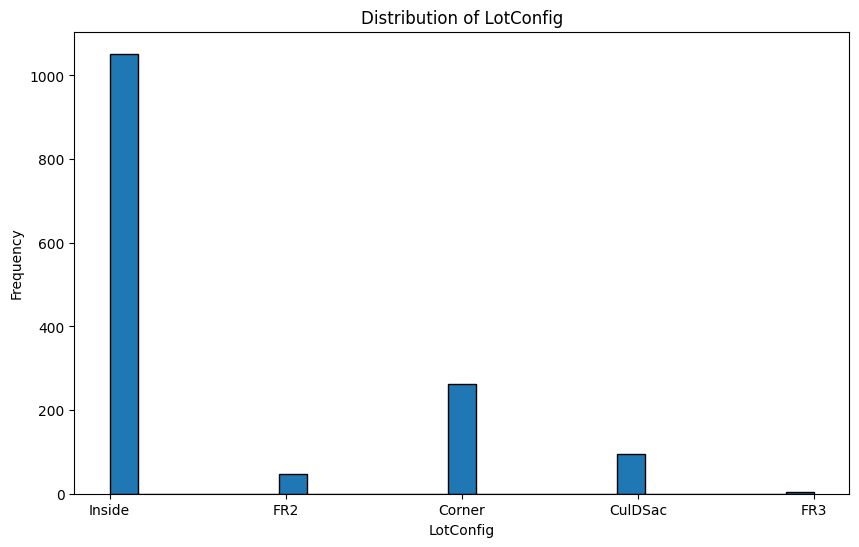

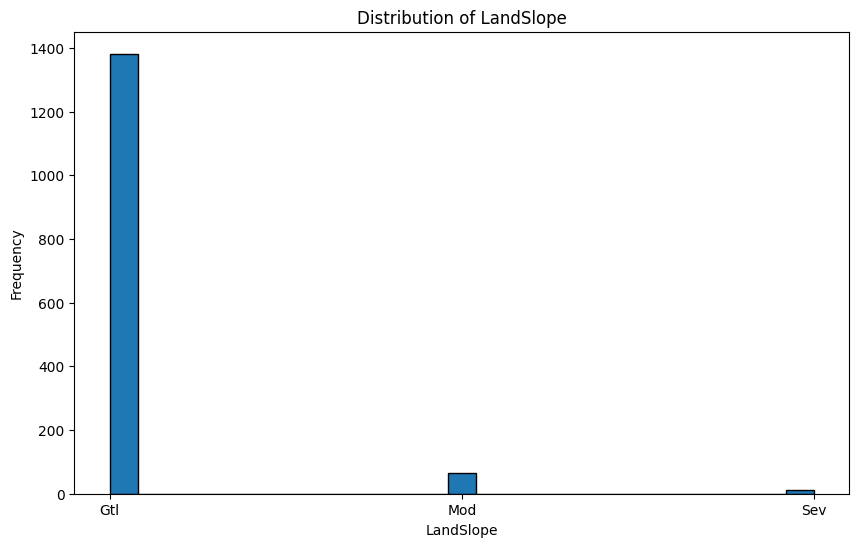

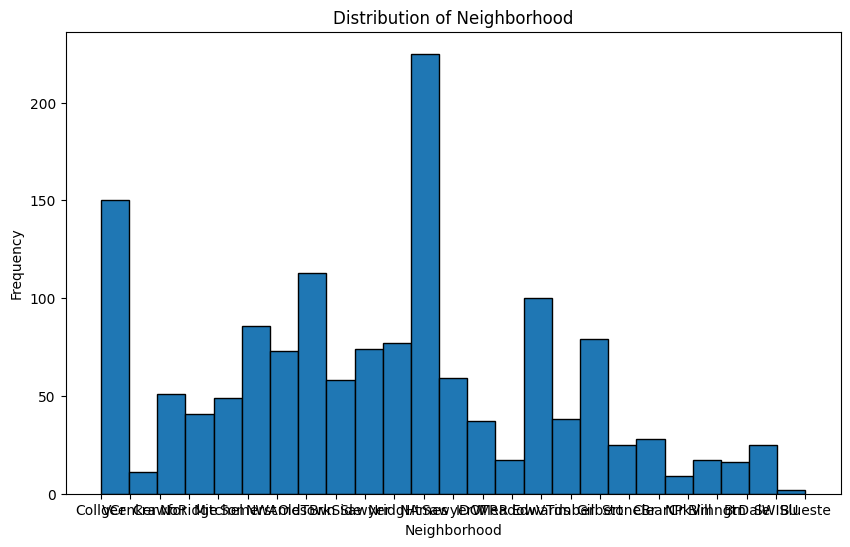

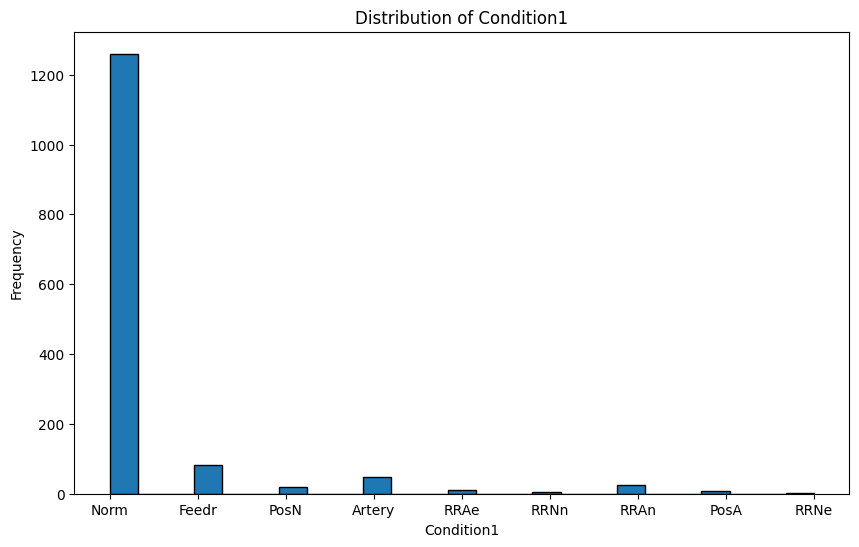

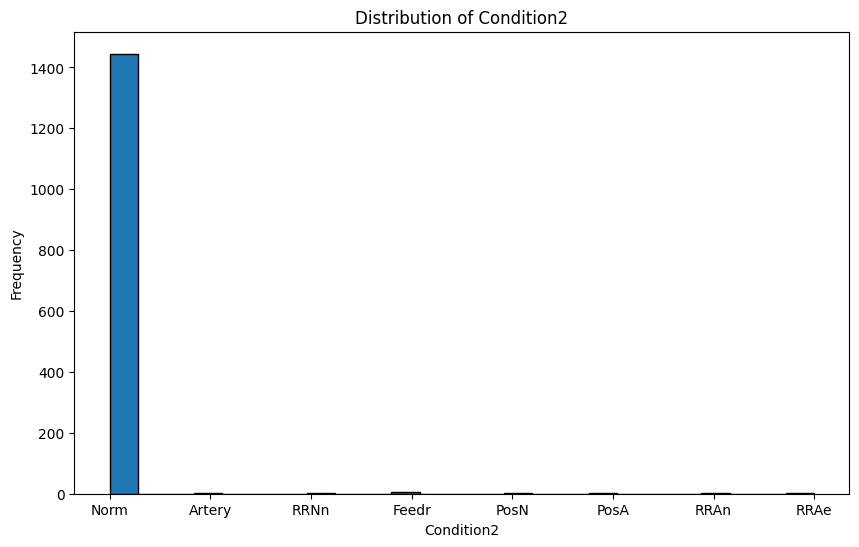

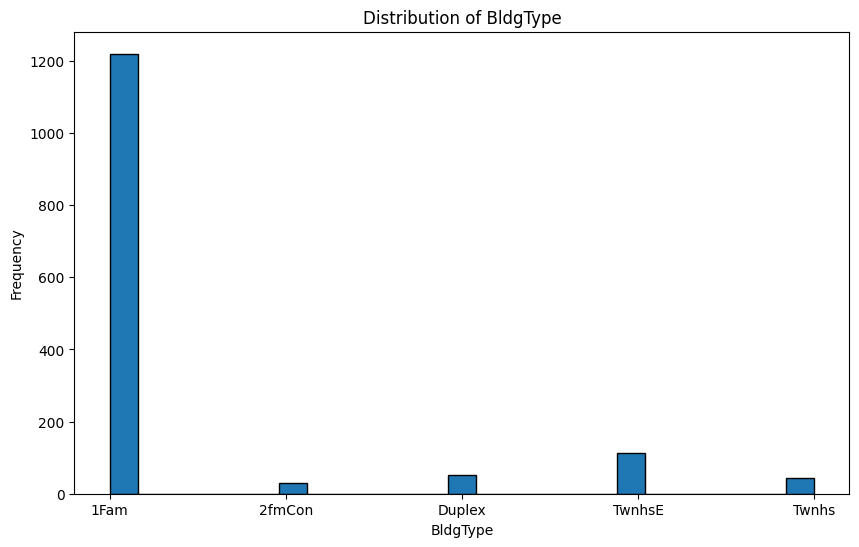

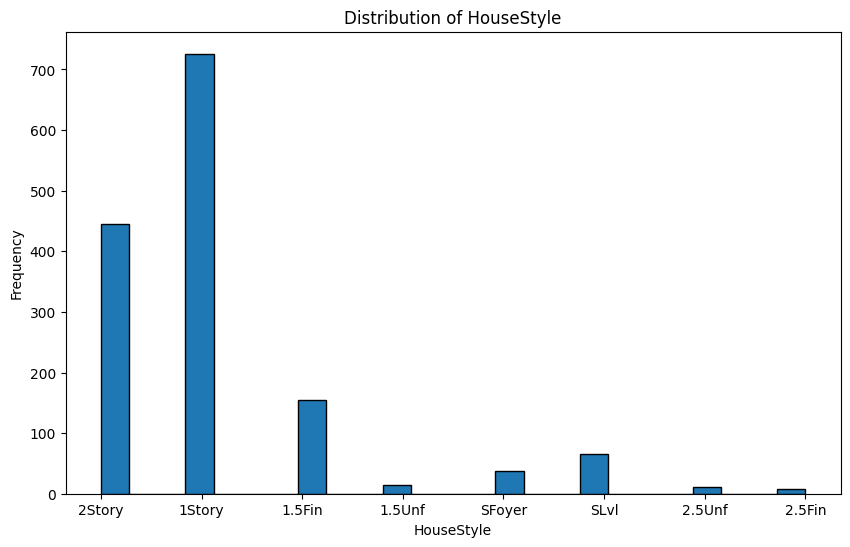

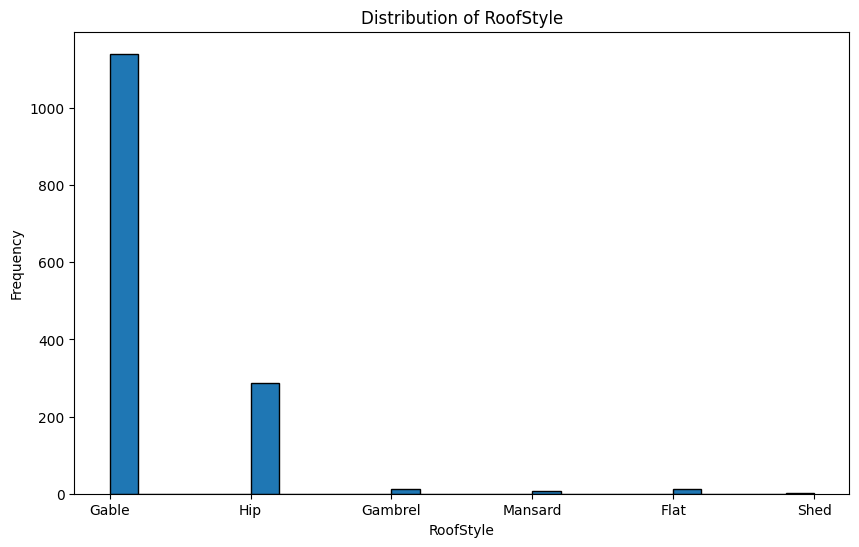

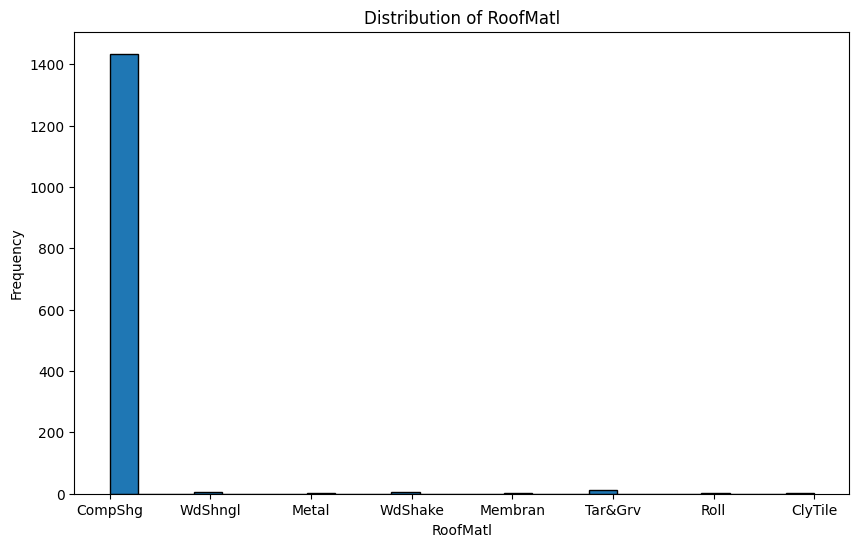

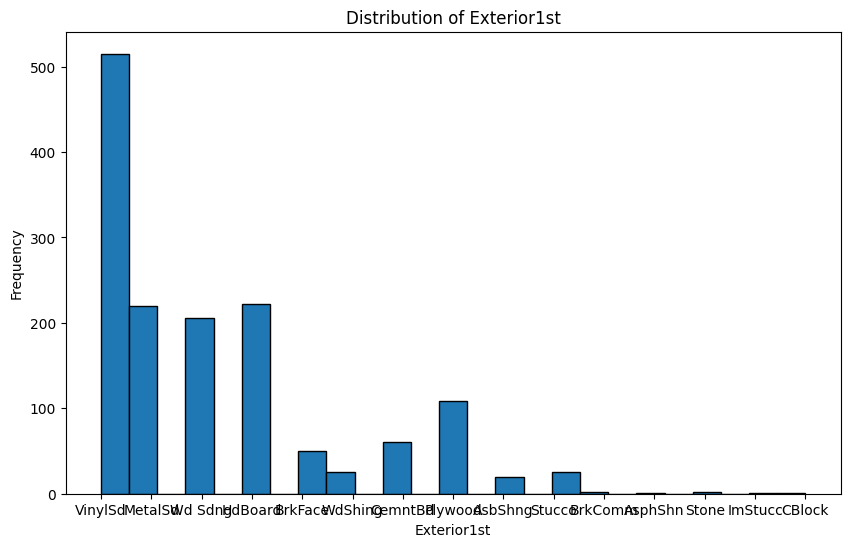

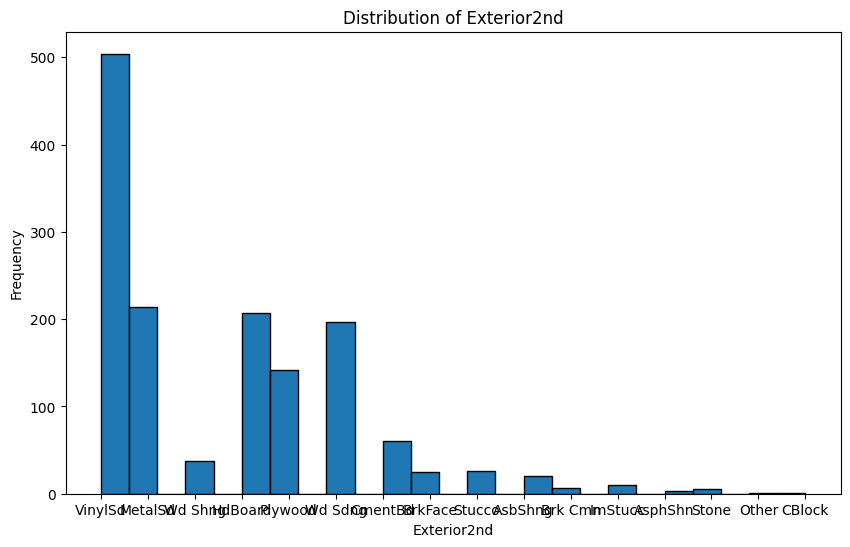

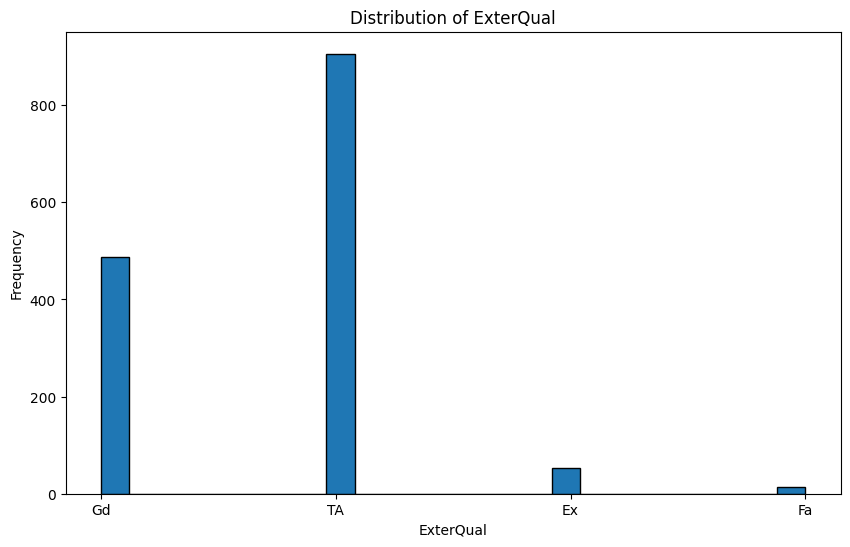

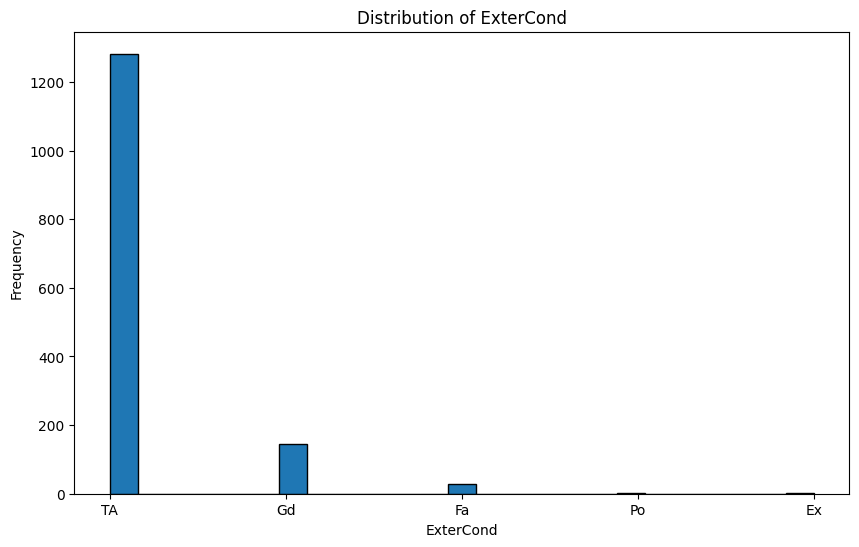

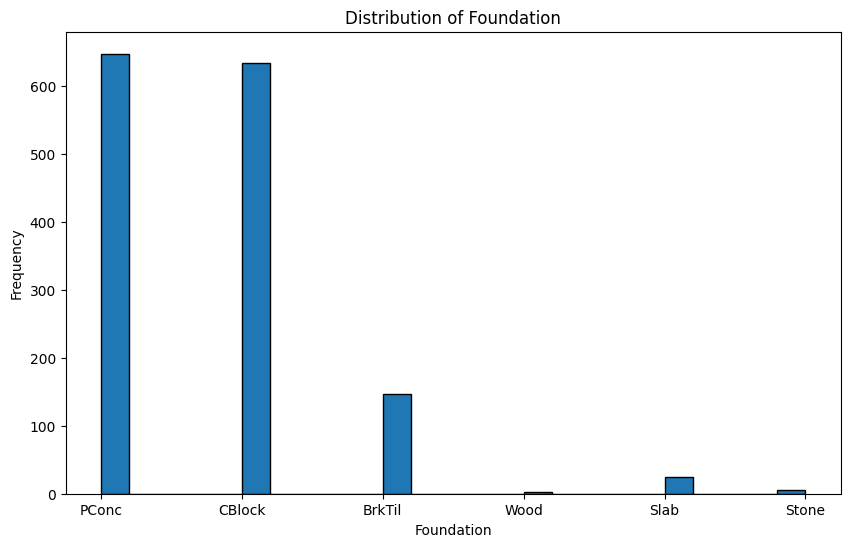

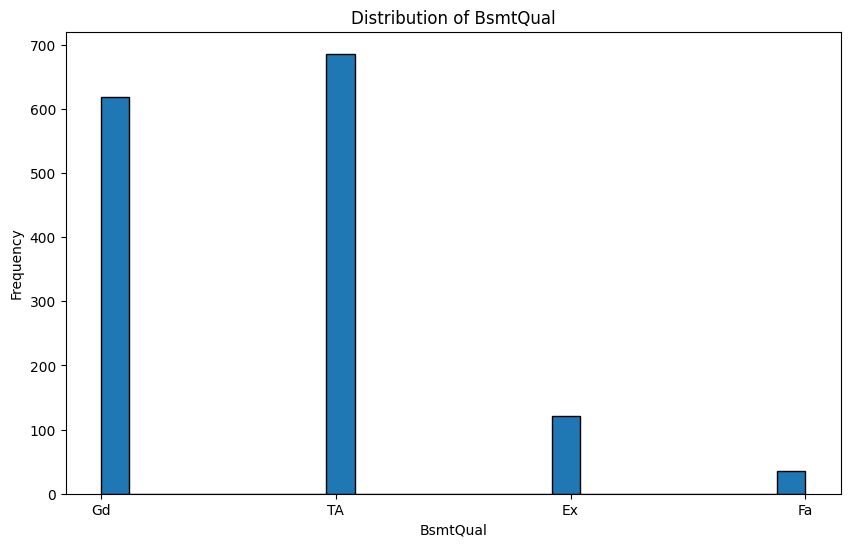

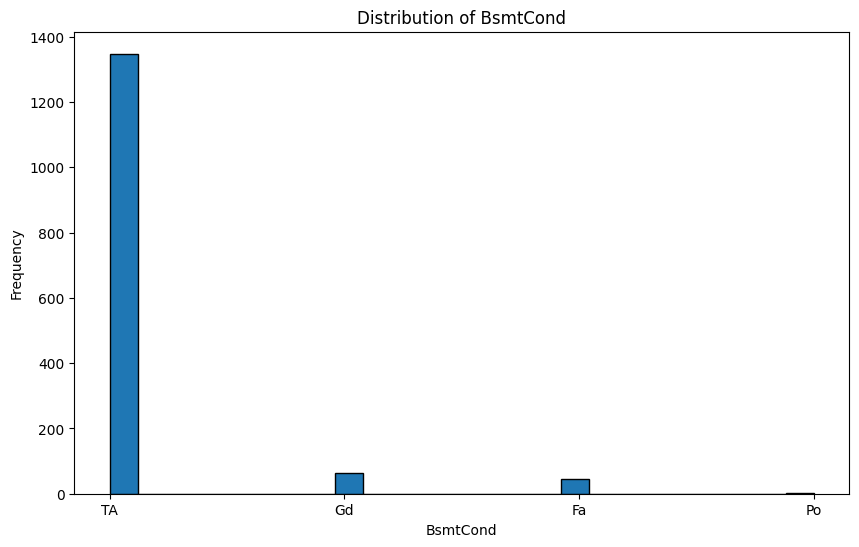

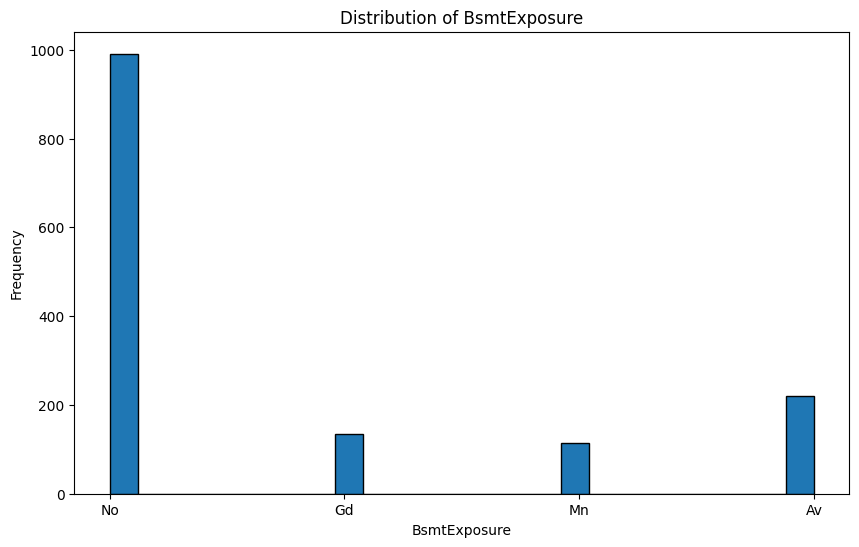

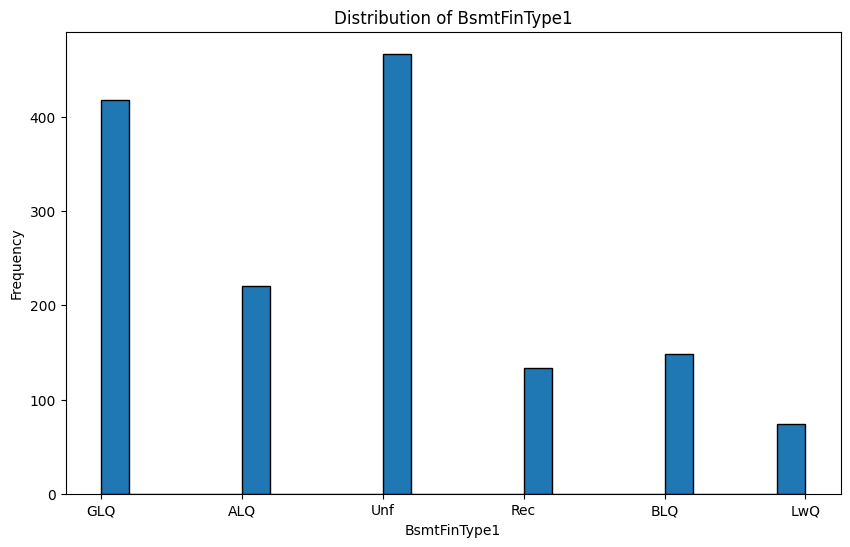

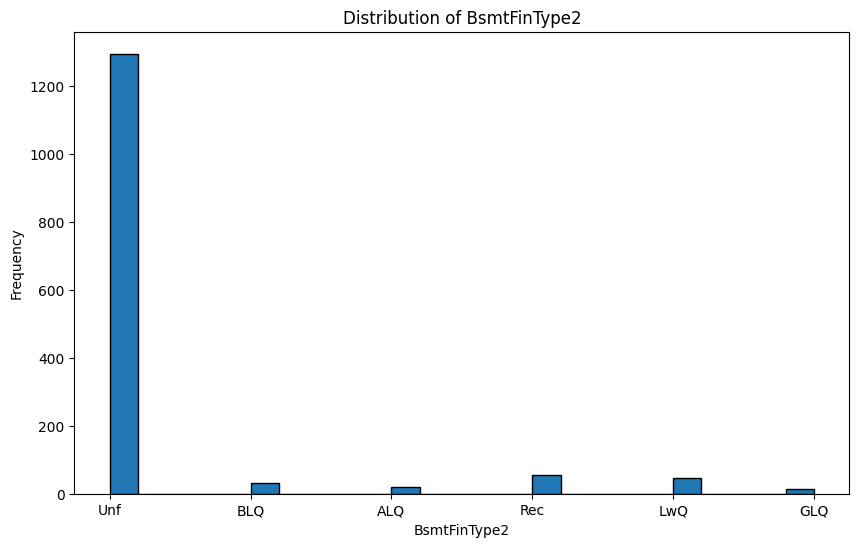

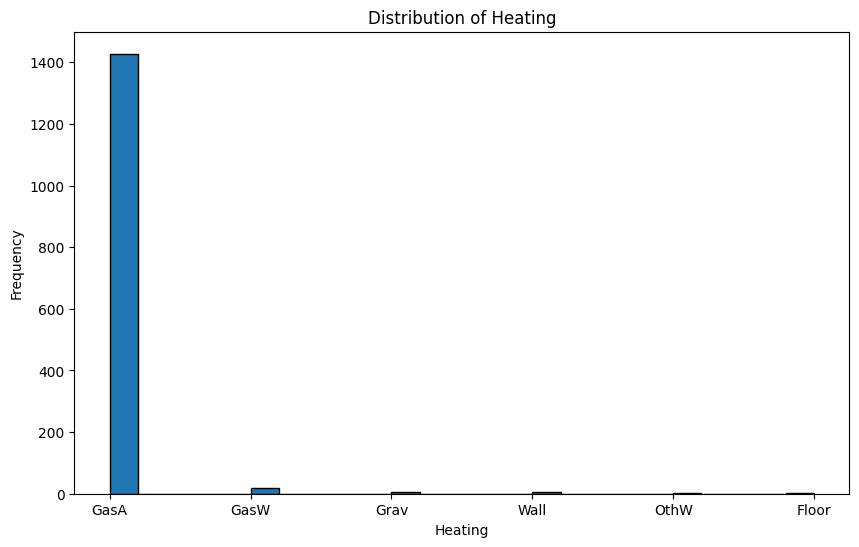

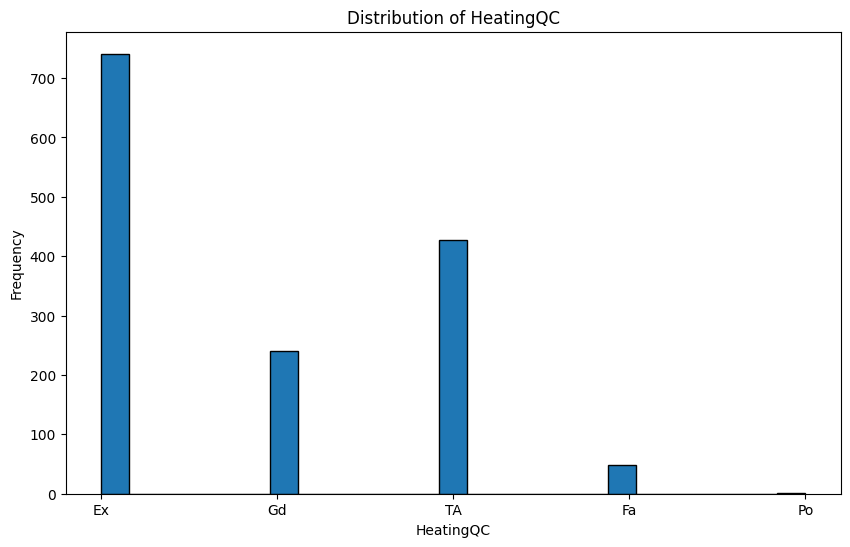

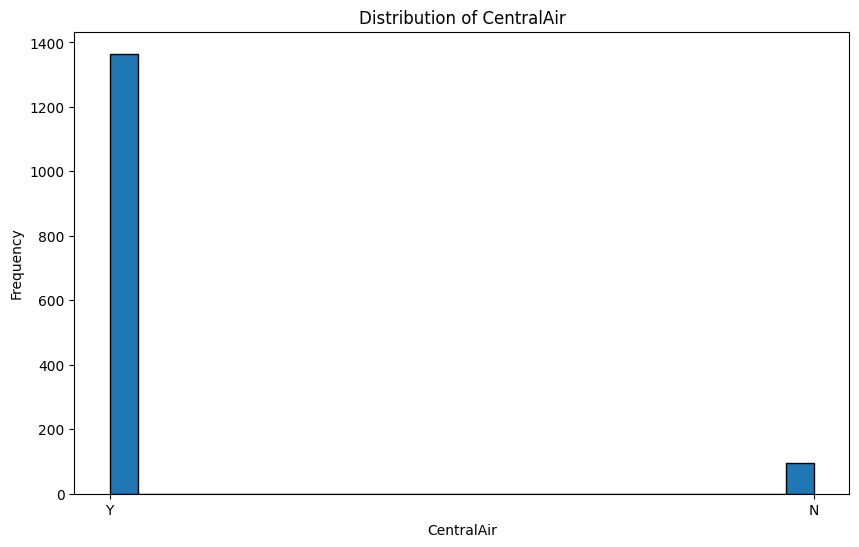

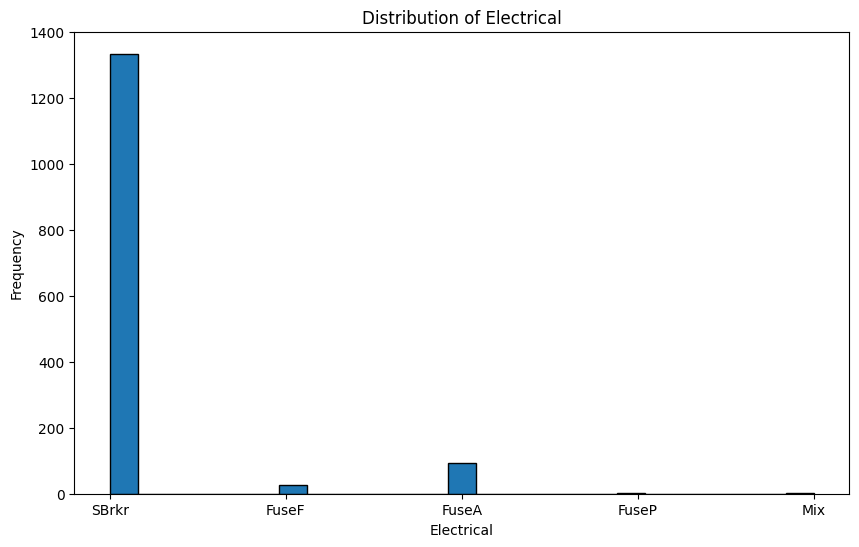

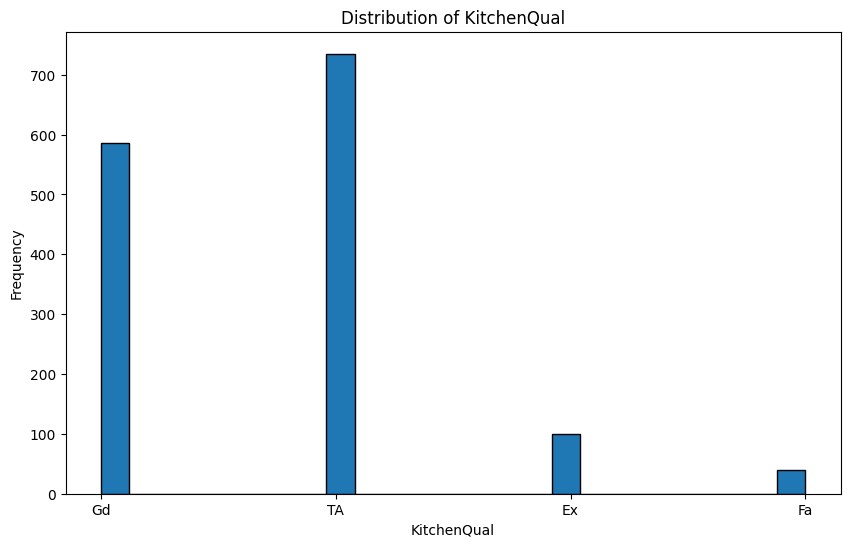

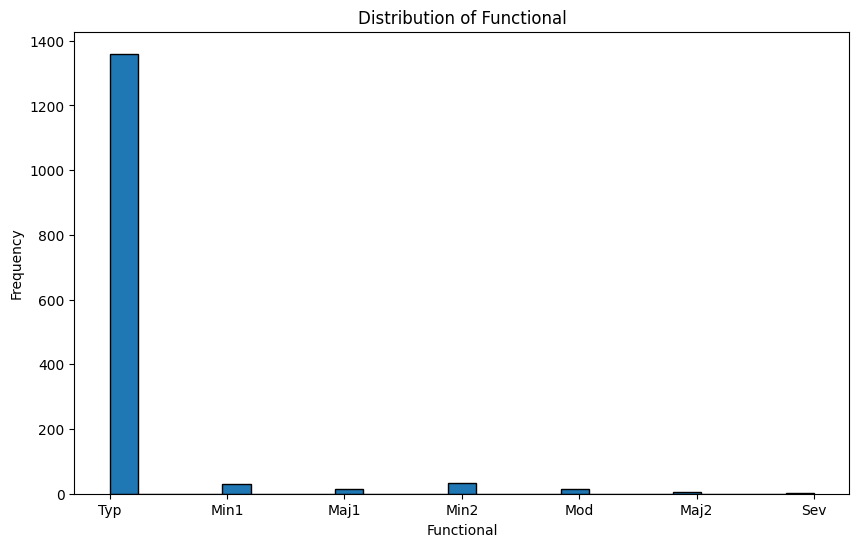

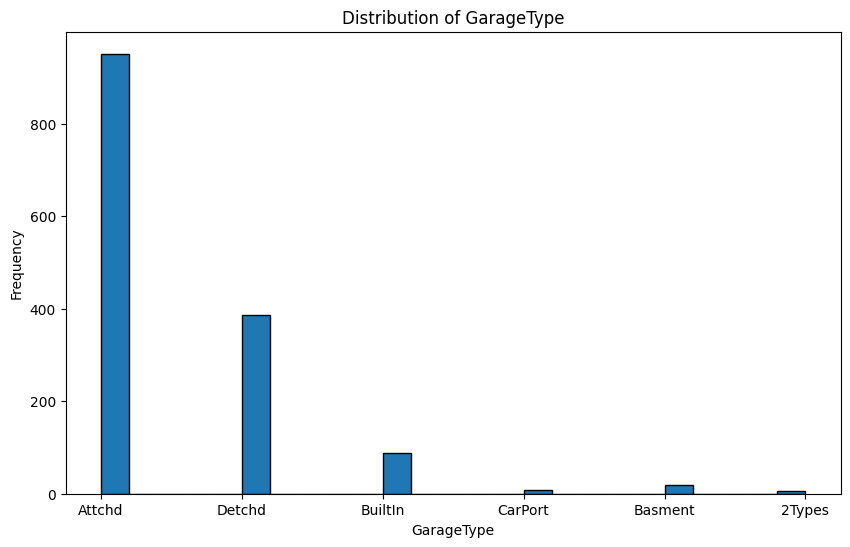

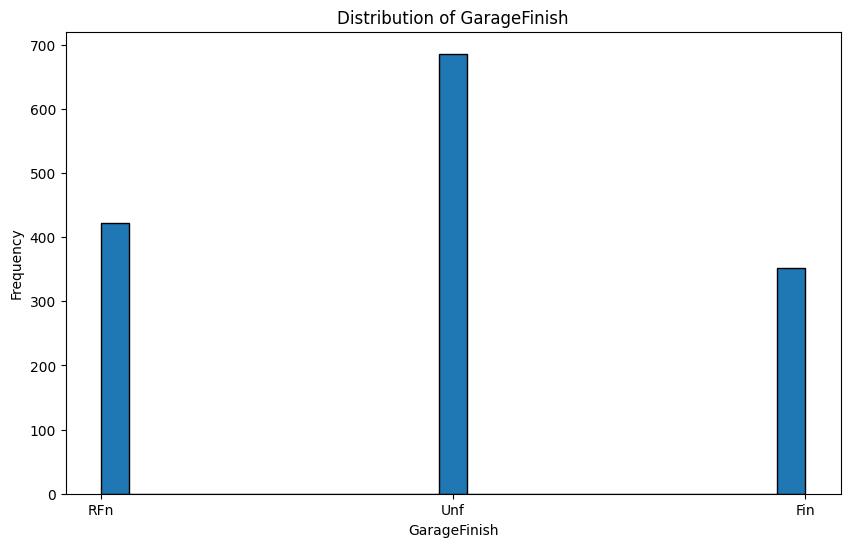

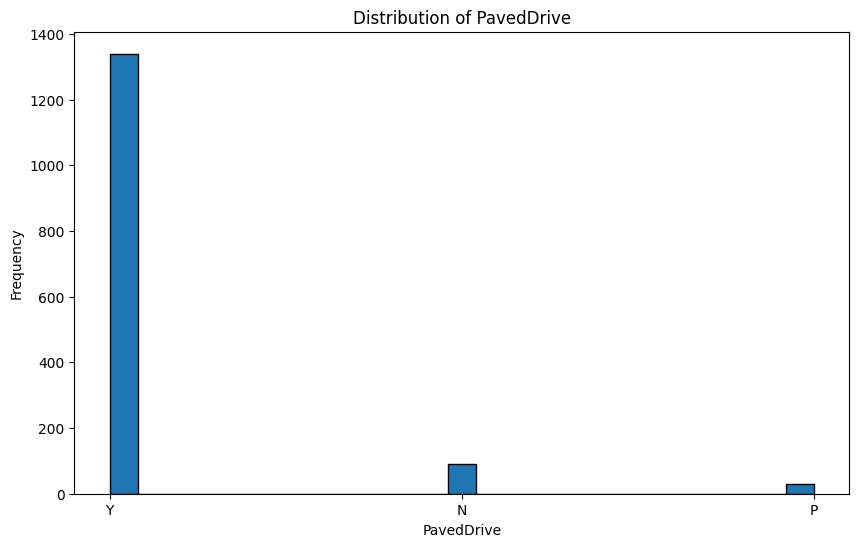

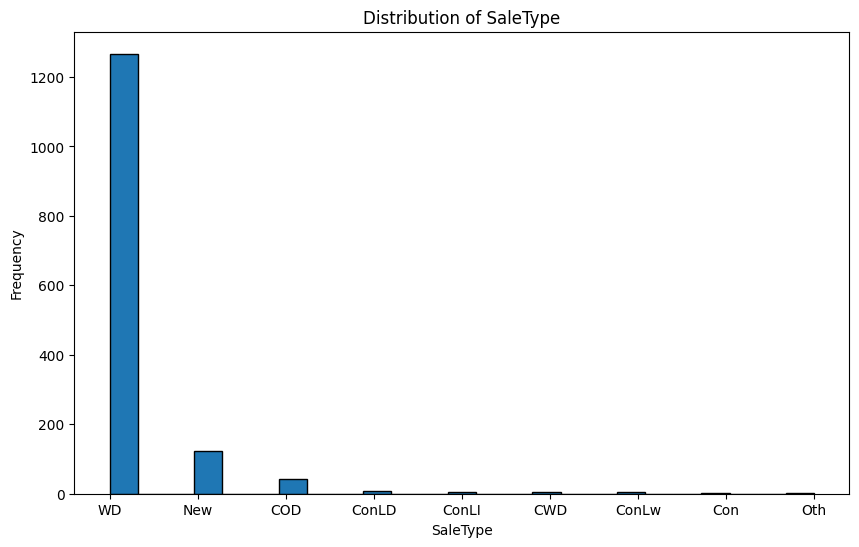

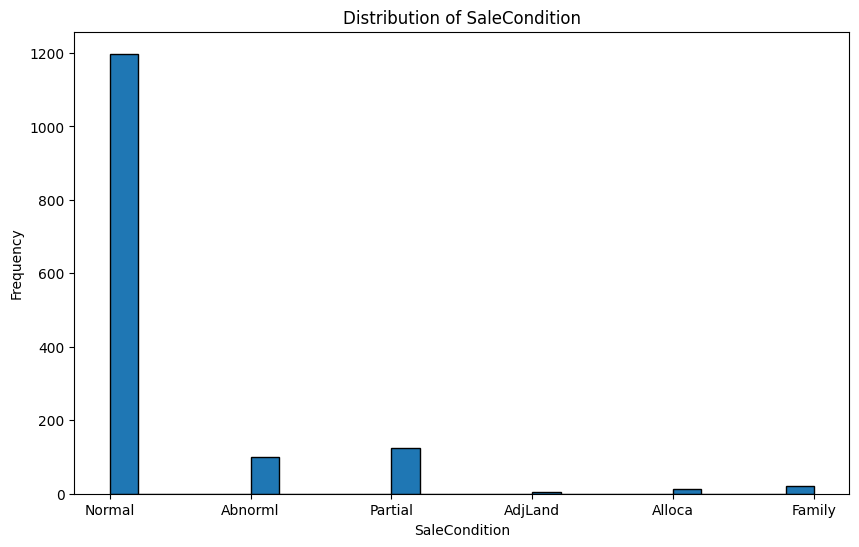

In [296]:
for cat_col in categorical_columns: # make a histogram for each categorical column
    plot_hist(df_cleaned, cat_col, bins=25)  # <-- Adjust the number of bins as needed

In [297]:
columns_to_drop = [
    'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 
    'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'CentralAir'
]

df_cleaned = df_cleaned.drop(columns=columns_to_drop)


We also erase this columns since they have a huge proporcion of just one category than the other ones

In [298]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [299]:
df_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

We will drop the Id, since this feature is not worth for the final model

In [300]:
# df_cleaned.drop(columns=['Id'], inplace=True)

In [301]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

After analyzing some graphs, we realized that some numeric columns are actually categorical variables represented as numbers, so we will convert them into objects.

In [302]:
df_cleaned['MSSubClass'].value_counts()

# pass this into a object column
df_cleaned['MSSubClass'] = df_cleaned['MSSubClass'].astype('object')

In [303]:
# df_cleaned['OverallCond'].value_counts()

# df_cleaned['OverallCond'] = df_cleaned['OverallCond'].astype('object')

In [304]:
# df_cleaned['OverallQual'].value_counts()

# df_cleaned['OverallQual'] = df_cleaned['OverallQual'].astype('object')

In [305]:
# df_cleaned['BsmtFullBath'].value_counts() change_here

# df_cleaned['BsmtFullBath'] = df_cleaned['BsmtFullBath'].astype('object')

In [306]:
# df_cleaned['FullBath'].value_counts() change_here

# df_cleaned['FullBath'] = df_cleaned['FullBath'].astype('object')

In [307]:
df_cleaned['GarageCars'].value_counts()

df_cleaned['GarageCars'] = df_cleaned['GarageCars'].astype('object')

In [308]:
df_cleaned['MoSold'].value_counts()

df_cleaned['MoSold'] = df_cleaned['MoSold'].astype('object')     

In [309]:
df_cleaned['Fireplaces'].value_counts()

df_cleaned['Fireplaces'] = df_cleaned['Fireplaces'].astype('object')     

In [310]:
df_cleaned['YrSold'].value_counts()

df_cleaned['YrSold'] = df_cleaned['YrSold'].astype('object')     

In [311]:
df_cleaned['TotRmsAbvGrd'].value_counts()

df_cleaned['TotRmsAbvGrd'] = df_cleaned['TotRmsAbvGrd'].astype('object')     

In [312]:
df_cleaned['BedroomAbvGr'].value_counts()

df_cleaned['BedroomAbvGr'] = df_cleaned['BedroomAbvGr'].astype('object')     

In [313]:
df_cleaned['HalfBath'].value_counts()

df_cleaned['HalfBath'] = df_cleaned['HalfBath'].astype('object')     

## Multivariate analysis

Let's look at the numeric correlations

In [314]:
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()

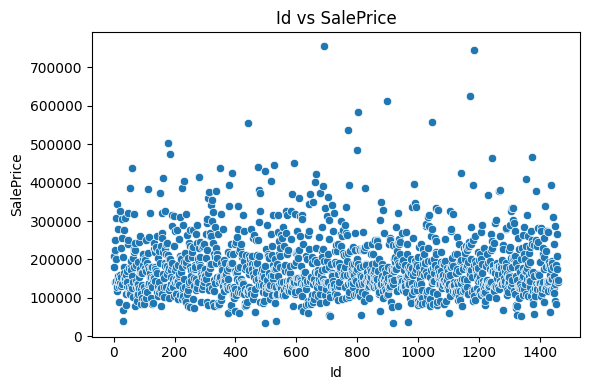

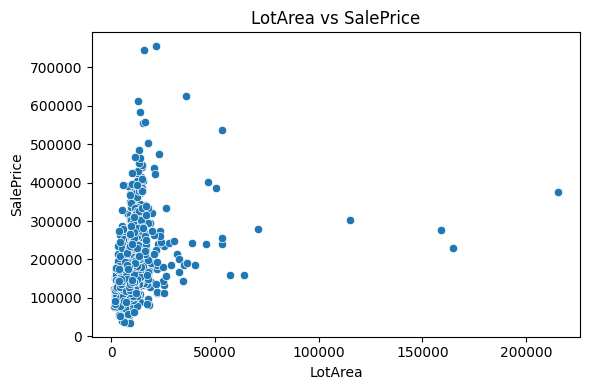

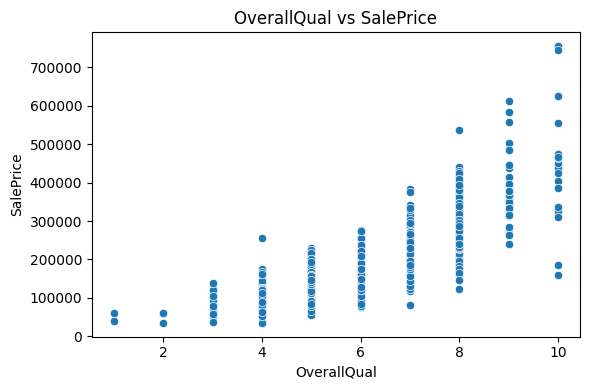

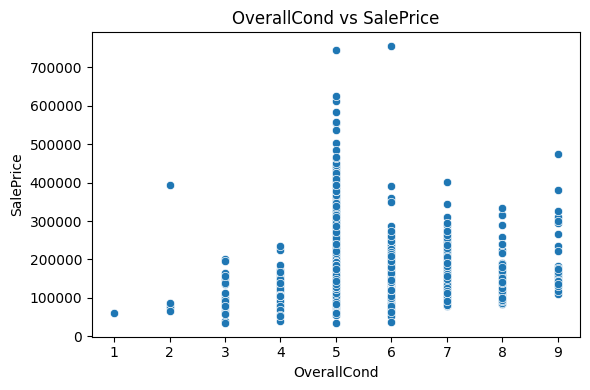

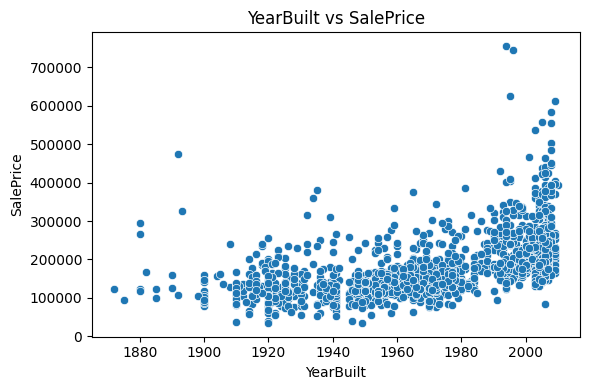

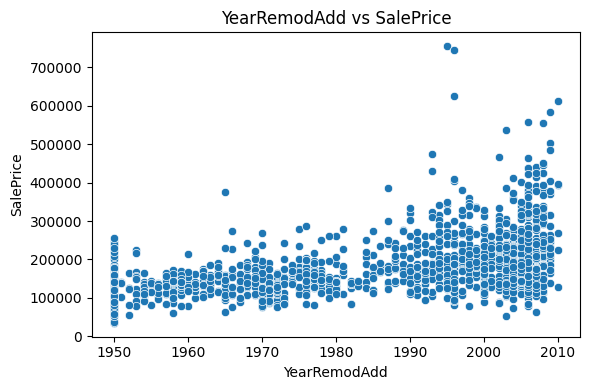

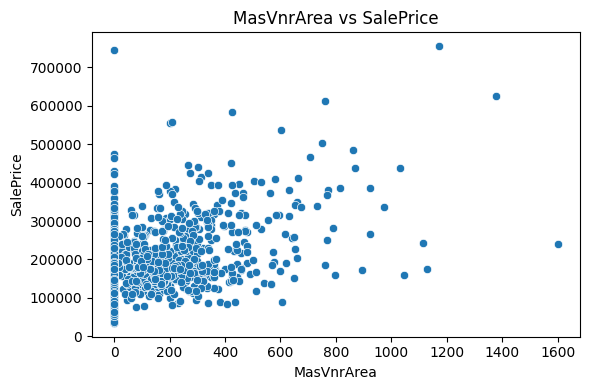

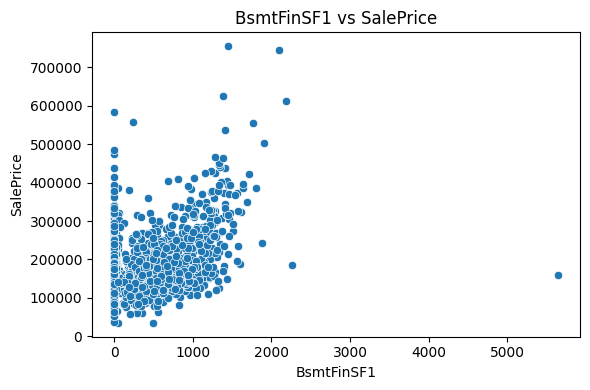

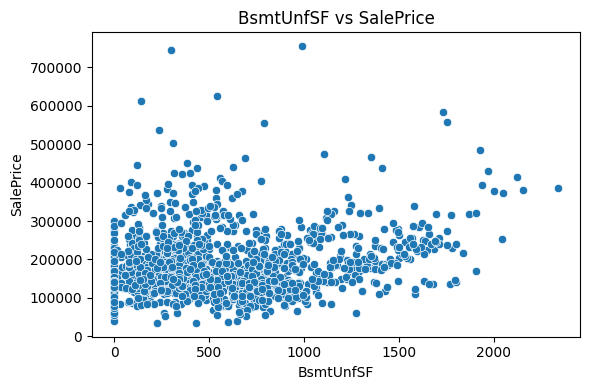

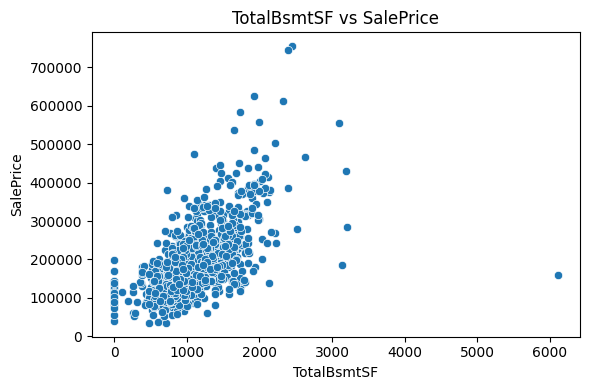

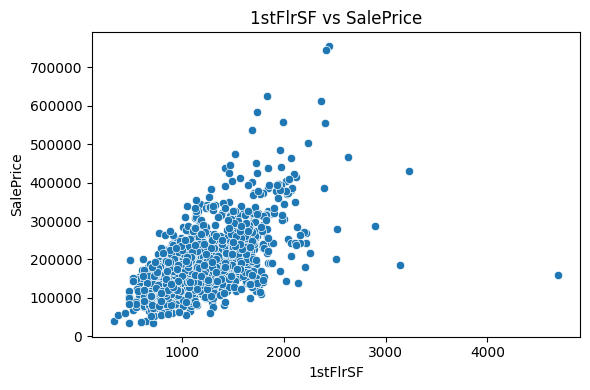

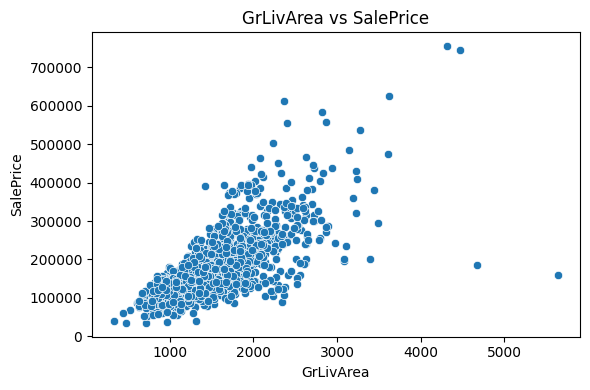

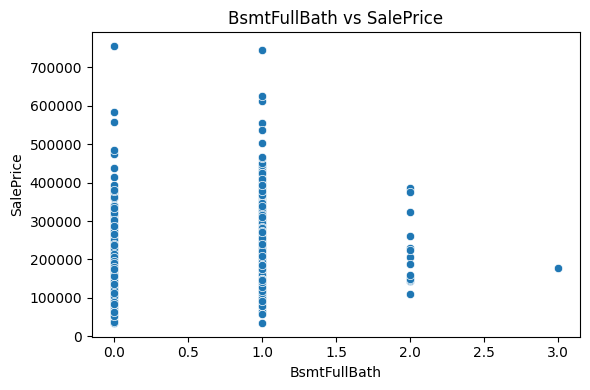

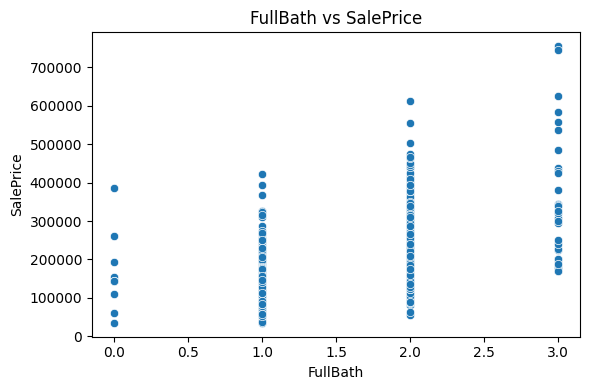

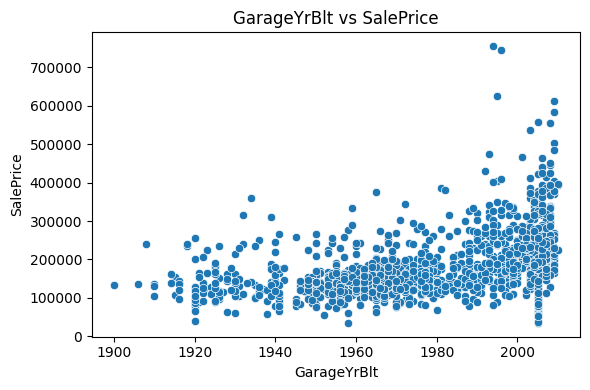

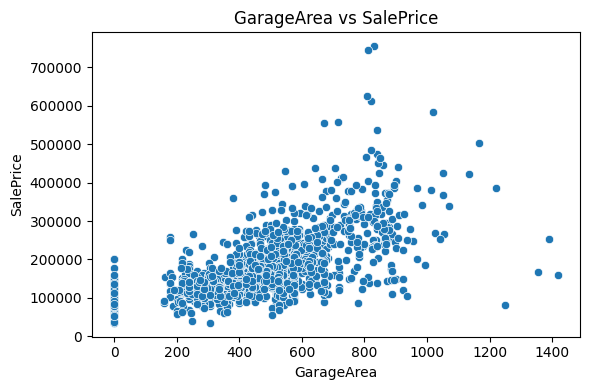

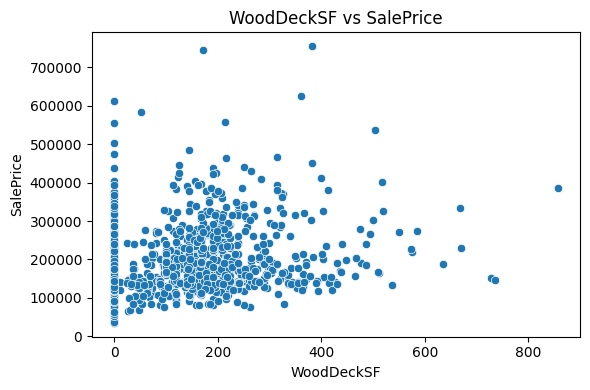

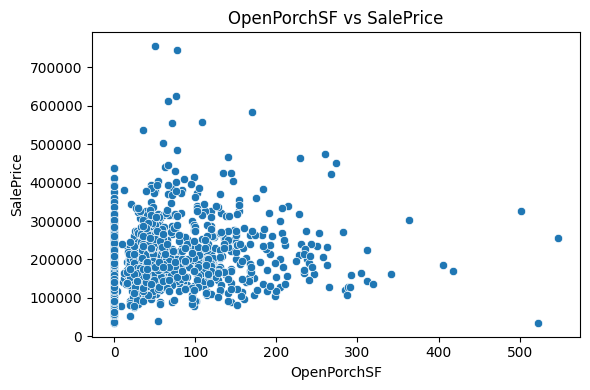

In [315]:
import seaborn as sns

target_column = 'SalePrice'

# Create scatter plots
for col in numerical_columns:
    if col != target_column:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df_cleaned, x=col, y=target_column)
        plt.title(f"{col} vs {target_column}")
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.tight_layout()
        plt.show()

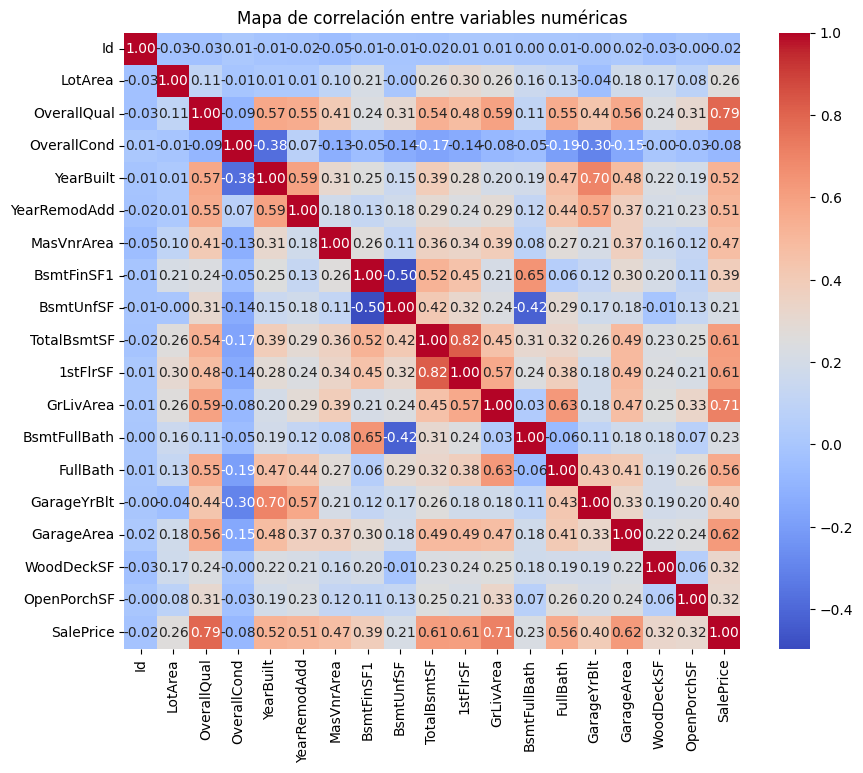

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un DataFrame solo con las columnas numéricas
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlation_matrix = numeric_df.corr()

# Tamaño del gráfico
plt.figure(figsize=(10, 8))

# Mapa de calor de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)

# Título del gráfico
plt.title("Mapa de correlación entre variables numéricas")

# Muestra el gráfico
plt.show()


To improve our linear regression model and reduce multicollinearity, we are applying the following feature selection decisions based on correlation analysis:

- `GarageYrBlt` has a strong correlation (0.70) with `YearBuilt`. Since `YearBuilt` has a stronger correlation with the target variable, we will **drop `GarageYrBlt`**.

- `YearBuilt` and `YearRemodAdd` are correlated (0.59). However, `YearBuilt` has a higher correlation with the target, so we will **drop `YearRemodAdd`**.

- We observed that: BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF

Since `TotalBsmtSF` encompasses the other three, we will **drop `BsmtFinSF1`**, **`BsmtFinSF2`**, and **`BsmtUnfSF`** to avoid redundant features.

These decisions aim to simplify the model and improve its predictive performance by removing highly correlated or derived features.


In [317]:
df_cleaned = df_cleaned.drop(columns=['GarageYrBlt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF' ])

In [318]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  ExterCon

Plotting the categories agains my target

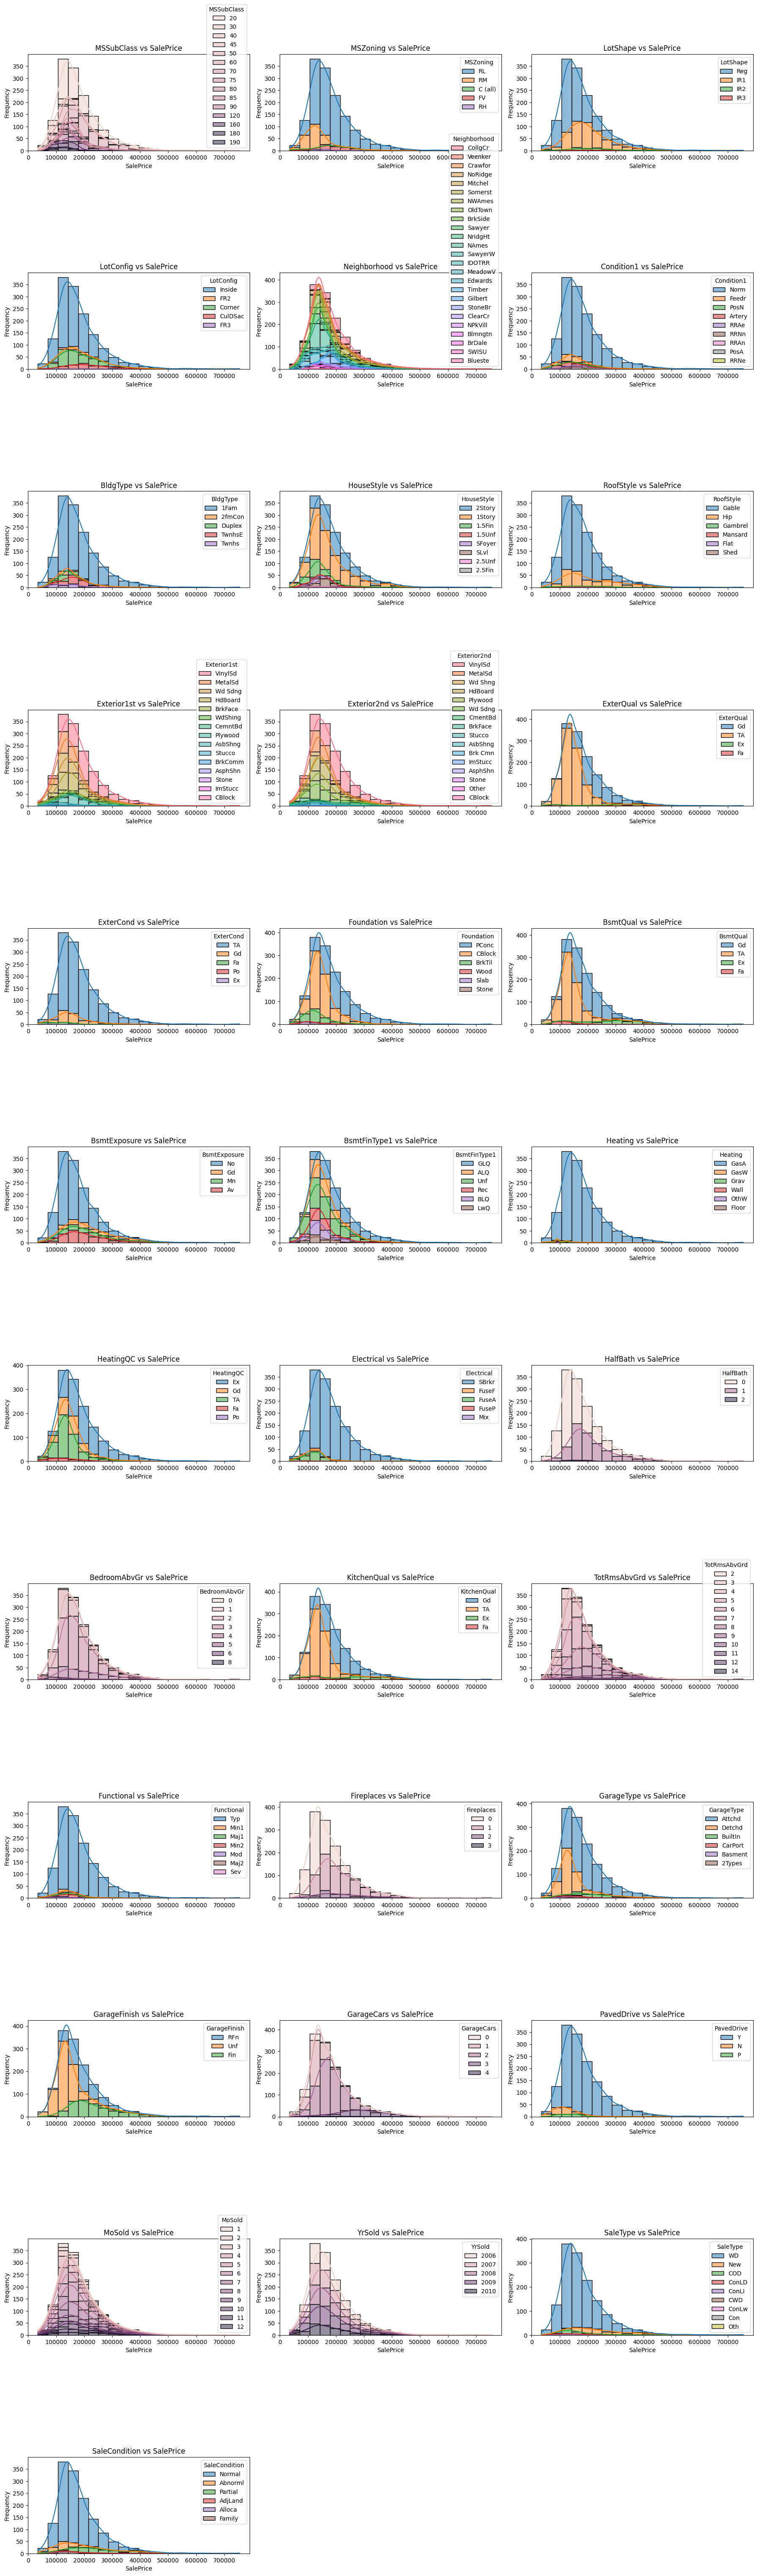

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all categorical columns (dtype 'object')
categorical_cols = df_cleaned.select_dtypes(include='object').columns

# Set up the plot grid
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 5))

# Loop through each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Plot histograms for SalePrice grouped by category in blue
    sns.histplot(data=df_cleaned, x='SalePrice', hue=col, kde=True, multiple="stack", color="blue", bins=20)
    
    plt.title(f'{col} vs SalePrice')
    plt.xlabel('SalePrice')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Training Models

In [320]:
# create a df called metrics with a name_model column and r2_score column and rmse column
metrics = pd.DataFrame(columns=['name_model', 'r2_score', 'rmse', 'log-rmse'])


In [321]:
metrics

Empty DataFrame
Columns: [name_model, r2_score, rmse, log-rmse]
Index: []

In [322]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=['SalePrice'])
y = df_cleaned['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = X_train.drop(columns=['Id'])

In [323]:
df_cleaned['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

---

In [324]:
# Binarize target for WoE encoding
y_train_binary = (y_train > y_train.median()).astype(int)


In [325]:
def compute_woe(series, target):
    eps = 1e-4
    woe_map = {}
    for category in series.unique():
        mask = series == category
        good = ((mask) & (target == 1)).sum()
        bad = ((mask) & (target == 0)).sum()
        dist_good = good / target.sum()
        dist_bad = bad / (len(target) - target.sum())
        woe = np.log((dist_good + eps) / (dist_bad + eps))
        woe_map[category] = woe
    return series.map(woe_map), woe_map


In [326]:
# X_train = X_train.copy()
# X_train['SaleType_WoE'], woe_map = compute_woe(X_train['SaleType'], y_train_binary)

In [327]:
# X_test['SaleType_WoE'] = X_test['SaleType'].map(woe_map).fillna(0)  # Handle unknown categories


In [328]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'Electrical', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [329]:
from sklearn.base import BaseEstimator, TransformerMixin

class WoETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, woe_map=None):
        self.woe_map = woe_map

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Ensure X is a DataFrame and apply WoE transformation to the first column
        if isinstance(X, pd.DataFrame):
            X_series = X.iloc[:, 0]
        else:
            X_series = pd.Series(X[:, 0])
        return X_series.map(self.woe_map).fillna(0).values.reshape(-1, 1)


According to the graphs bar since there is one predominant category in RL and less in other categories, we will select just if it's RL or not

In [330]:
from sklearn.base import BaseEstimator, TransformerMixin

class MSZoningBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['MSZoning'] = (X['MSZoning'] == 'RL').astype(int)
        return X


In [331]:
class SaleCondBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['SaleCondition'] = (X['SaleCondition'] == 'Normal').astype(int)
        return X

In [332]:
class SaleTypeBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['SaleType'] = (X['SaleType'] == 'WD').astype(int)
        return X

In [333]:
class PavedDriveBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['PavedDrive'] = (X['PavedDrive'] == 'Y').astype(int)
        return X

In [334]:
class GarageTypeBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['GarageType'] = (X['GarageType'] == 'Attchd').astype(int)
        return X

In [335]:
class FunctionalBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Functional'] = (X['Functional'] == 'Typ').astype(int)
        return X

In [336]:
class ElectricalBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Electrical'] = (X['Electrical'] == 'SBrkr').astype(int)
        return X

In [337]:
class Heatingransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['Heating'] = (X['Heating'] == 'GasA').astype(int)
        return X

We will use the same approach to the column Condition1

---

### Linear Regression

In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


numerical_columns = X_train.select_dtypes(include=['number']).columns.tolist()

label_encoder_columns = ['LotShape', 'MoSold', 'SaleCondition', 'GarageCars', 'TotRmsAbvGrd']

woe_columns = ['SaleType']

transformer_columns = ['MSZoning', 'Condition1', 'BldgType']
                       

categorical_columns = [col for col in X_train.select_dtypes(include=['object']).columns 
                       if col not in (label_encoder_columns + transformer_columns)]



# preprocessor = make_column_transformer(
#     (SimpleImputer(strategy='most_frequent'), label_encoder_columns),
#     (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), label_encoder_columns),
#     (OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False), 
#      categorical_columns + transformer_columns),  # 👈 fix is here
#     (MSZoningBinaryTransformer(), ['MSZoning']),
#     remainder='passthrough',
#     verbose_feature_names_out=False
# )
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Label encoder pipeline
label_enc_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# One-hot encoder pipeline
onehot_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Numerical pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # or median
    ('scaler', StandardScaler())
])


# Final column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_columns),
    ('label_enc', label_enc_pipeline, label_encoder_columns),
    ('onehot', onehot_pipeline, categorical_columns + transformer_columns),
    ('mszone', MSZoningBinaryTransformer(), ['MSZoning']),
    ('saletype', SaleTypeBinaryTransformer(), ['SaleType']),
    ('paveddrive', PavedDriveBinaryTransformer(), ['PavedDrive']),
    ('garagetype', GarageTypeBinaryTransformer(), ['GarageType']),
    ('functional', FunctionalBinaryTransformer(), ['Functional']),
    ('electrical', ElectricalBinaryTransformer(), ['Electrical']),
    ('heating', Heatingransformer(), ['Heating'])
], remainder='passthrough', verbose_feature_names_out=False)


In [339]:
expected_columns = numerical_columns + label_encoder_columns + categorical_columns + transformer_columns + ['MSZoning']
# Adjust if MSZoning is already part of categorical_columns or so

def fix_columns(X_new):
    # Add missing columns with NaN
    for col in expected_columns:
        if col not in X_new.columns:
            X_new[col] = np.nan
    
    # Select and reorder columns exactly as expected
    X_new = X_new.loc[:, expected_columns]
    
    return X_new


In [340]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

model_linear_regression = make_pipeline(
    preprocessor,                 # este es un ColumnTransformer ya definido
    TransformedTargetRegressor(
        regressor=LinearRegression(),
        func=np.log1p,
        inverse_func=np.expm1
    )
)


In [341]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include='object').columns.tolist()

# ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_columns),
#         ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
#     ]
# )

# Full pipeline
# model_linear_regression = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

# Fit model
model_linear_regression.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'MasVnrArea', 'TotalBsmtSF',
                                                   '1stFlrSF', 'GrLivArea',
                                                   'BsmtFullBath', 'FullBath',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF']),
                                                 ('label...
                                                  ['GarageType']),
                                                 ('functional',
                                                  FunctionalBinaryTransformer(),
                                                  ['Functional']),
                                                 ('electrical',
                                                  ElectricalBinaryTransformer(),
                                                  ['Electrical']),
                                                 ('heating',
                                                  Heatingransformer(),
                                                  ['Heating'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [342]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred = model_linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)    
r2 = r2_score(y_test, y_pred)
# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"RMSE (log-transformed): {rmse_log:.2f}")


Root Mean Squared Error: 24381.16
R^2 Score: 0.92
RMSE (log-transformed): 0.13


In [343]:
metrics.loc[len(metrics)] = ['Linear Regression', r2, rmse, rmse_log]

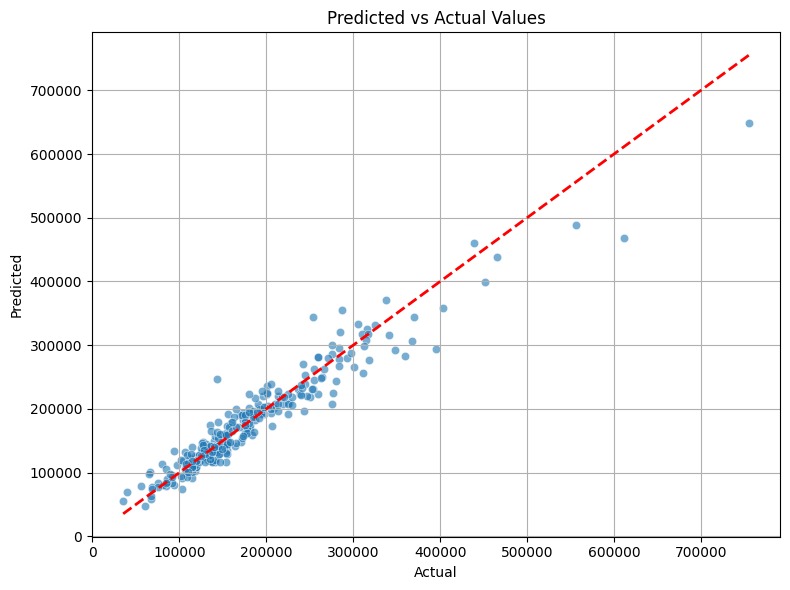

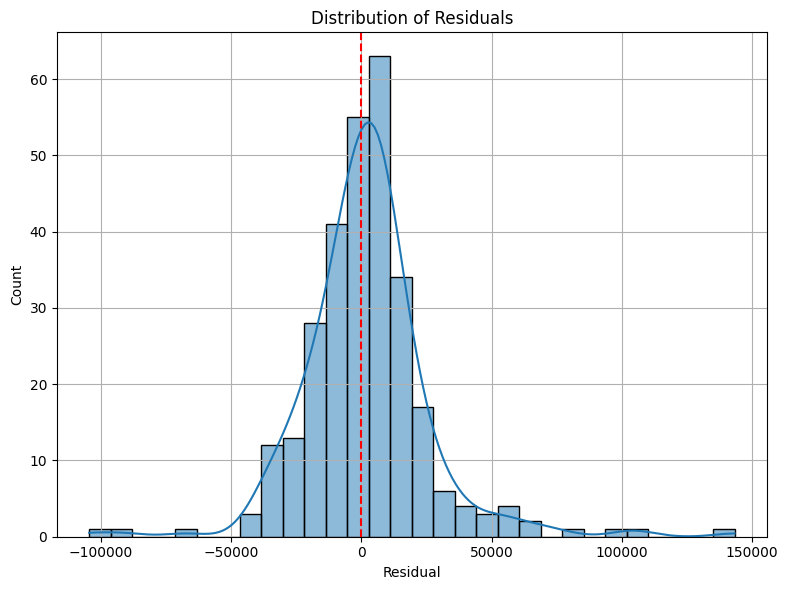

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model_linear_regression.predict(X_test)

# Plot 1: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residual')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


### Ridge

In [345]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

model_ridge = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=0.5),
        func=np.log1p,  # Apply log transformation to the target variable
        inverse_func=np.expm1  # Inverse transformation to get back to original scale
    )
)

In [346]:
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'MasVnrArea', 'TotalBsmtSF',
                                                   '1stFlrSF', 'GrLivArea',
                                                   'BsmtFullBath', 'FullBath',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF']),
                                                 ('label...
                                                  ['GarageType']),
                                                 ('functional',
                                                  FunctionalBinaryTransformer(),
                                                  ['Functional']),
                                                 ('electrical',
                                                  ElectricalBinaryTransformer(),
                                                  ['Electrical']),
                                                 ('heating',
                                                  Heatingransformer(),
                                                  ['Heating'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Ridge(alpha=0.5)))])

In [347]:
y_pred = model_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mse)
# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Root Mean Squared Error (log-transformed): {rmse_log:.2f}")
print(f"R^2 Score: {r2:.2f}")

Root Mean Squared Error: 23933.17
Root Mean Squared Error (log-transformed): 0.13
R^2 Score: 0.93


In [348]:
metrics.loc[len(metrics)] = ['Ridge Regression', r2, rmse, rmse_log]

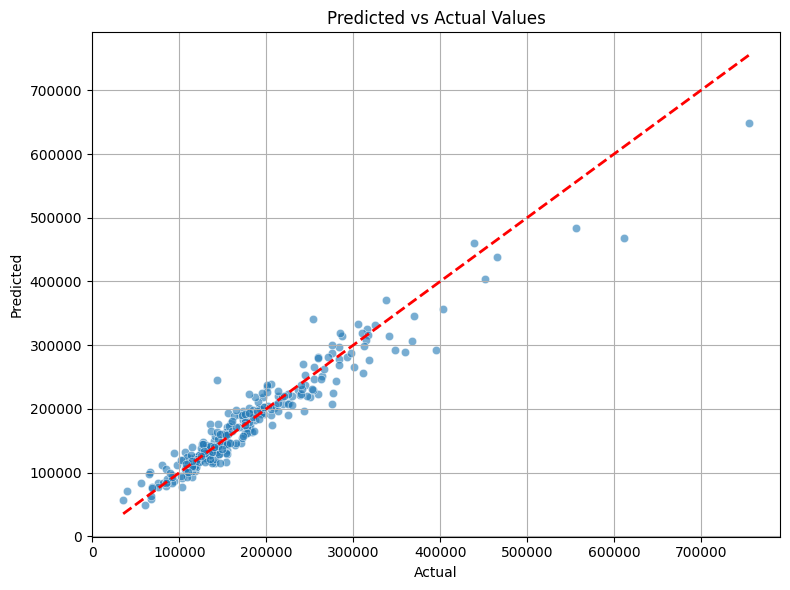

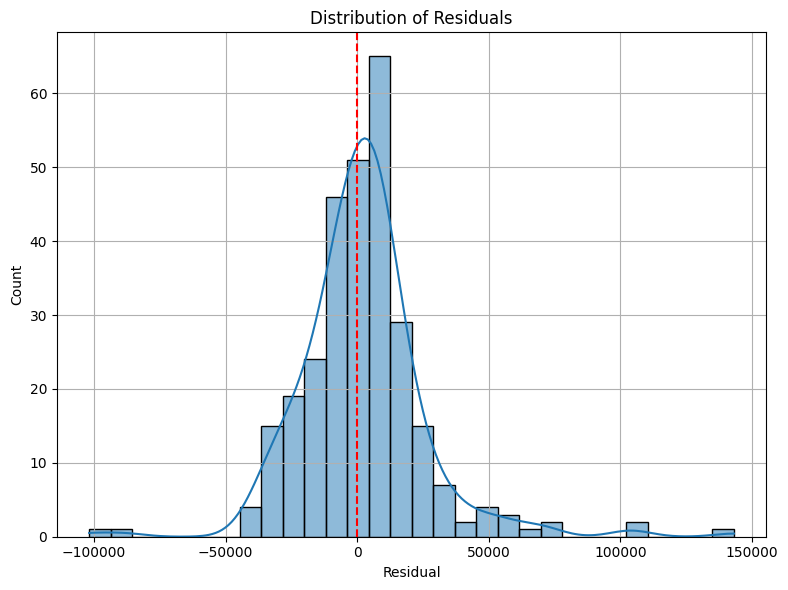

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model_ridge.predict(X_test)

# Plot 1: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residual')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


In [350]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

# Define a list of alphas to search over
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

model_ridgecv = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas, store_cv_values=True),
        func=np.log1p,      # log(1 + y) transformation
        inverse_func=np.expm1  # exp(y) - 1 to get back original target
    )
)

# best alpha


In [351]:
model_ridgecv.fit(X_train, y_train)
best_alpha = model_ridgecv.named_steps['transformedtargetregressor'].regressor_.alpha_
print(f"Best alpha: {best_alpha:.2f}")

Best alpha: 10.00


c:\Users\quine\Documents\repos_github\notebooks\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [352]:
model_ridgecv.fit(X_train, y_train)
y_pred = model_ridgecv.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Log RMSE:", rmse_log)
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 23936.46798894811
MAE: 15719.094925660022
Log RMSE: 0.12990437782950054
R² Score: 0.9253024598550872


c:\Users\quine\Documents\repos_github\notebooks\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [353]:
metrics.loc[len(metrics)] = ['RidgeCV Regression', r2, rmse, rmse_log]

### Lasso

In [354]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

model_lasso = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Lasso(alpha=0.5),
        func=np.log1p,  # Apply log transformation to the target variable
        inverse_func=np.expm1  # Inverse transformation to get back to original scale
    )
)

In [355]:
model_lasso.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'MasVnrArea', 'TotalBsmtSF',
                                                   '1stFlrSF', 'GrLivArea',
                                                   'BsmtFullBath', 'FullBath',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF']),
                                                 ('label...
                                                  ['GarageType']),
                                                 ('functional',
                                                  FunctionalBinaryTransformer(),
                                                  ['Functional']),
                                                 ('electrical',
                                                  ElectricalBinaryTransformer(),
                                                  ['Electrical']),
                                                 ('heating',
                                                  Heatingransformer(),
                                                  ['Heating'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Lasso(alpha=0.5)))])

In [356]:
y_pred = model_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"RMSE (log-transformed): {rmse_log:.2f}")

Root Mean Squared Error: 88270.85
R^2 Score: -0.02
RMSE (log-transformed): 0.43


In [357]:
metrics.loc[len(metrics)] = ['Lasso', r2, rmse, rmse_log]

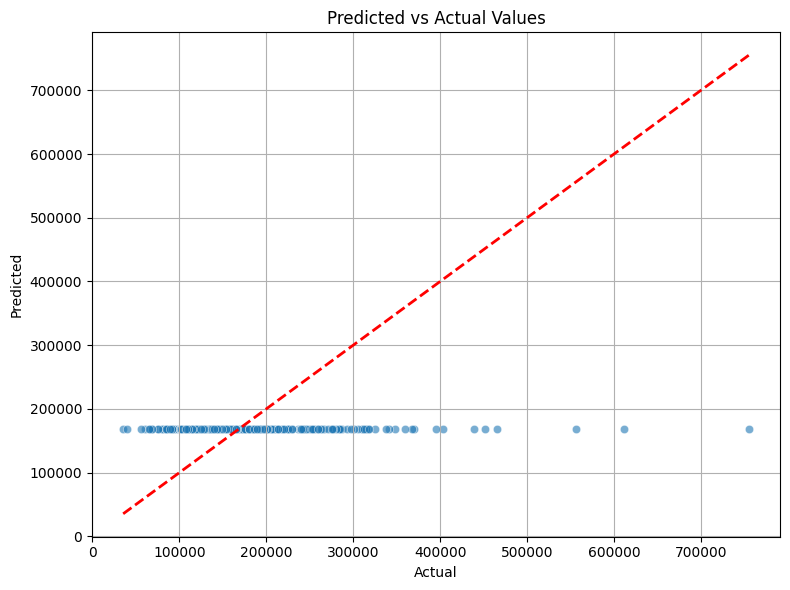

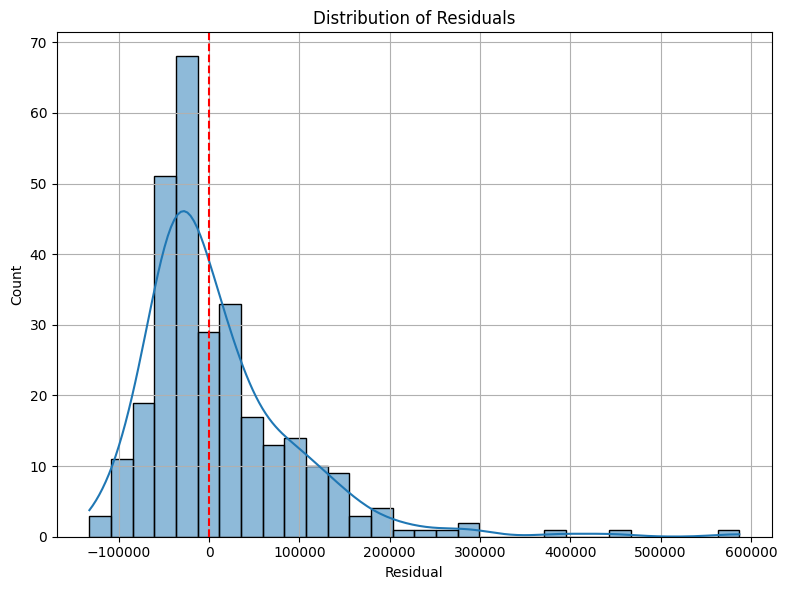

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model_lasso.predict(X_test)

# Plot 1: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residual')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


In [359]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

# Define alpha candidates (LassoCV will automatically cross-validate to find the best)
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]

lasso_pipeline = make_pipeline(
    preprocessor,
    LassoCV(alphas=alphas, cv=5, max_iter=10000),
)


In [360]:
# Wrap the pipeline with TransformedTargetRegressor
model_lasso = TransformedTargetRegressor(
    regressor=lasso_pipeline,
    func=np.log1p,        # log(1 + y)
    inverse_func=np.expm1 # exp(y) - 1
)


In [361]:
model_lasso.fit(X_train, y_train)


TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('columntransformer',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('num',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer()),
                                                                                                       ('scaler',
                                                                                                        StandardScaler())]),
                                                                                       ['LotArea',
                                                                                        'OverallQual',
                                                                                        'OverallCond',
                                                                                        'YearBuilt',
                                                                                        'MasVnrArea',
                                                                                        'TotalBsmtSF',
                                                                                        '1stFlrSF',
                                                                                        'G...
                                                                                       ['PavedDrive']),
                                                                                      ('garagetype',
                                                                                       GarageTypeBinaryTransformer(),
                                                                                       ['GarageType']),
                                                                                      ('functional',
                                                                                       FunctionalBinaryTransformer(),
                                                                                       ['Functional']),
                                                                                      ('electrical',
                                                                                       ElectricalBinaryTransformer(),
                                                                                       ['Electrical']),
                                                                                      ('heating',
                                                                                       Heatingransformer(),
                                                                                       ['Heating'])],
                                                                        verbose_feature_names_out=False)),
                                                     ('lassocv',
                                                      LassoCV(alphas=[0.0001,
                                                                      0.001,
                                                                      0.01, 0.1,
                                                                      1.0],
                                                              cv=5,
                                                              max_iter=10000))]))

In [362]:
# Access the fitted LassoCV model inside the pipeline
lasso_model_fitted = model_lasso.regressor_.named_steps['lassocv']

# Print the best alpha
print("Best alpha selected by LassoCV:", lasso_model_fitted.alpha_)

Best alpha selected by LassoCV: 0.001


In [363]:
# Predict on test set
y_pred = model_lasso.predict(X_test)

# Metric: RMSE between log-transformed predictions and actuals
rmse_log = sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))

print(f"Log-Scale RMSE: {rmse_log:.4f}")

# Also print normal RMSE and R^2 for comparison
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Normal RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Log-Scale RMSE: 0.1362
Normal RMSE: 24998.61
R^2 Score: 0.92


In [364]:
metrics.loc[len(metrics)] = ['LassoCV', r2, rmse, rmse_log]

In [365]:
metrics

name_model  r2_score          rmse  log-rmse
0   Linear Regression  0.922501  24381.155786  0.126219
1    Ridge Regression  0.925323  23933.166603  0.125242
2  RidgeCV Regression  0.925323  23933.166603  0.129904
3               Lasso -0.015829  88270.853655  0.433244
4             LassoCV  0.918526  24998.605590  0.136206

***

### 🔤 Label Encoding
- **LotShape**  ✅ Done (Label Encoded)
- **OverallQual**
- **OverallCond**
- **BsmtQual**
- **KitchenQual**
- **MSSubClass** — ✅ Should be a categorical object
- **BsmtFullBath** — ✅ Done (Label Encoded)
- **FullBath** — ✅ Done (Label Encoded)
- **HalfBath** — ⚠️ Should be a categorical object
- **BedroomAbvGr** — 🚧 Pending
- **KitchenQual**
- **TotRmsAbvGrd**
- **FirePlaces**
- **GarageCars**
- **MoSold**
- **SaleCondition** ✅ SaleCondBinaryTransformer


---

### 🧩 One-Hot Encoding
- **MSZoning** ✅ Done (passed to binary)
- **LotConfig**
- **BldgType**
- **RoofStyle**
- **ExterQual**
- **ExterCond**
- **BsmtExposure** — ❓ Ask
- **Electrical**  ✅ ElectricalBinaryTransformer
- **GarageFinish**
- **YrSold**

---

### ⚖️ Other Approach
- **Neighborhood**
- **Condition1**
- **HouseStyle**
- **Exterior1st**
- **Exterior2nd**
- **Foundation**
- **BsmtFinType1**
- **HeatingQC**
- **Heating**  ✅ Heatingransformer
- **Functional** ✅ FunctionalBinaryTransformer
- **GarageType** ✅ GarageTypeBinaryTransformer
- **SaleType** ✅ SaleTypeBinaryTransformer
- **PavedDrive** ✅ PavedDriveBinaryTransformer


***


We will use RidgeCV Regression

Create the submission file

In [366]:
# Step 1: Drop ID column if it exists
final_test = df_test.drop(columns=['Id'], errors='ignore')

# Step 2: Predict
y_test_pred = model_ridgecv.predict(final_test)

submission = df_test[['Id']].copy()
submission['SalePrice'] = y_test_pred
submission.to_csv('submission.csv', index=False)
submission.head()

Id      SalePrice
0  1461  111173.949328
1  1462  151894.432557
2  1463  168145.912048
3  1464  193094.649740
4  1465  196169.770923